[View in Colaboratory](https://colab.research.google.com/github/tadasi12/dev/blob/master/sampleAutoEncoders.ipynb)

<details><summary>Qiita(キータ)は、プログラマのための技術情報共有サービスです。</summary>プログラミングに関することをどんどん投稿して、知識を記録、共有しましょう。
Qiitaに投稿すると、自分のコードやノウハウを見やすい形で残すことができます。
技術情報はテキストファイルへのメモではなく、タグを付けた文章、シンタックスハイライトされたコードで保存することで初めて再利用可能な知識になる、そうQiitaでは考えています。</details>

# 0.準備

## Google Drive をマウントする

In [0]:
# 必要なパッケージを取得
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Colabratory用の認証トークンの生成
# 以下のコードを実行すると認証のリンクが表示され、リンク先に行って認証を行います。
from google.colab import auth
auth.authenticate_user()

In [2]:
# Drive FUSE library用の証明書の生成
# 以下のコードを実行すると認証のリンクが表示され、リンク先で認証を行います。
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Google Drive をマウントする
!mkdir -p drive
!google-drive-ocamlfuse drive

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
import sys
sys.path.append('drive/Colab Notebooks/vae')

## chainer



In [4]:
!pip install chainer
!pip install python-mnist

    100% |████████████████████████████████| 409kB 5.2MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/8a/ef/b0/e67e0555c4d520566d6565d9634ecb7fbb1594758236bb7b40
  Running setup.py bdist_wheel for filelock ... - done
  Stored in directory: /content/.cache/pip/wheels/35/ba/67/4cc48738870c3b54f9e3b5d78bf9de130befb70c1d359faf8b
Successfully built chainer filelock
  Running setup.py bdist_wheel for python-mnist ... - done
  Stored in directory: /content/.cache/pip/wheels/e3/67/aa/bea4c3dc84f590c0dabb8c00317b6b7f8e6bd43b095d7679d5
Successfully built python-mnist


## CUDA

In [5]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt --fix-broken install
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt install cuda-8.0 -y

import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

!apt-get install gcc-4.8-dev g++-4.8 -y -qq
!ln -s /usr/bin/gcc-4.8 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-4.8 /usr/local/cuda/bin/g++

--2018-07-29 13:20:23--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?ZeUVOOvqycEn9DdNWC3e8awqRCWWIDHsPiYv0fDc1OW3gzFgSxSjlHaS2VWWUR_S-rJFS3TaQhu2q2t7pia-NMU5eOJRoEbi9Hkvi2el_joPkzi9n5SAdtl_h8SHrj50FB1f8IQhclubhvXW-H-OJ-B6yM8GJaIQJWVSfwMOY9VhrQ1bvBD5zBMlxz5uI7VpD7cyo1wMTx65ws1LWwTXJaERCQ [following]
--2018-07-29 13:20:23--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?ZeUVOOvqycEn9DdNWC3e8awqRCWWIDHsPiYv0fDc1OW3gzFgSxSjlHaS2VWWUR_S-rJFS3TaQhu2q2t7pia-NMU5eOJR

cuda-repo-ubuntu160 100%[===================>]   1.78G  9.48MB/s    in 25s     

2018-07-29 13:20:49 (71.9 MB/s) - ‘cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb’ saved [1913589814/1913589814]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Selecting previously unselected package cuda-repo-ubuntu1604-8-0-local-ga2.
(Reading database ... 19833 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Note: Check first if apt-key functionality is needed at all - it probably isn't!
OK
OK
Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Relea

The following NEW packages will be installed:
  accountsservice acpid activity-log-manager adwaita-icon-theme apg aspell
  aspell-en at-spi2-core avahi-daemon avahi-utils bbswitch-dkms bind9-host
  bluez bluez-obexd bsdmainutils ca-certificates-java cheese-common
  cracklib-runtime crda cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0
  cuda-cublas-8-0 cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0
  cuda-cufft-8-0 cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0
  cuda-cusolver-8-0 cuda-cusolver-dev-8-0 cuda-cusparse-8-0
  cuda-cusparse-dev-8-0 cuda-demo-suite-8-0 cuda-documentation-8-0
  cuda-driver-dev-8-0 cuda-drivers cuda-license-8-0 cuda-misc-headers-8-0
  cuda-npp-8-0 cuda-npp-dev-8-0 cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0
  cuda-nvml-dev-8-0 cuda-nvrtc-8-0 cuda-nvrtc-dev-8-0 cuda-runtime-8-0
  cuda-samples-8-0 cuda-toolkit-8-0 cuda-visual-tools-8-0 cups-pk-helper
  dbus-user-session dbus-x11 dconf-cli dconf-gsettings-backend dconf-service
  default-jre default-j

Get:18 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 systemd-sysv amd64 234-2ubuntu12.4 [11.5 kB]
Get:19 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 udev amd64 234-2ubuntu12.4 [1,092 kB]
Get:20 http://archive.ubuntu.com/ubuntu artful/main amd64 libnfnetlink0 amd64 1.0.1-3 [13.3 kB]
Get:21 http://archive.ubuntu.com/ubuntu artful/main amd64 groff-base amd64 1.22.3-9 [1,144 kB]
Get:22 http://archive.ubuntu.com/ubuntu artful/main amd64 bsdmainutils amd64 9.0.12+nmu1ubuntu1 [179 kB]
Get:23 http://archive.ubuntu.com/ubuntu artful/main amd64 libpipeline1 amd64 1.4.2-1 [25.2 kB]
Get:24 http://archive.ubuntu.com/ubuntu artful/main amd64 man-db amd64 2.7.6.1-2 [895 kB]
Get:25 http://archive.ubuntu.com/ubuntu artful/main amd64 libntfs-3g872 amd64 1:2016.2.22AR.2-2 [145 kB]
Get:26 http://archive.ubuntu.com/ubuntu artful/main amd64 ntfs-3g amd64 1:2016.2.22AR.2-2 [380 kB]
Get:27 http://archive.ubuntu.com/ubuntu artful/main amd64 fontconfig amd64 2.11.94-0ubuntu2 [177 kB]

Get:97 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-xfixes0 amd64 1.12-1ubuntu1 [9,292 B]
Get:98 http://archive.ubuntu.com/ubuntu artful/main amd64 libxshmfence1 amd64 1.2-1 [5,042 B]
Get:99 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-amdgpu1 amd64 2.4.83-1 [18.5 kB]
Get:100 http://archive.ubuntu.com/ubuntu artful/main amd64 libpciaccess0 amd64 0.13.4-1ubuntu1 [17.9 kB]
Get:101 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-intel1 amd64 2.4.83-1 [59.7 kB]
Get:102 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-nouveau2 amd64 2.4.83-1 [16.4 kB]
Get:103 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-radeon1 amd64 2.4.83-1 [21.6 kB]
Get:104 http://archive.ubuntu.com/ubuntu artful/main amd64 libelf1 amd64 0.170-0.1 [44.3 kB]
Get:105 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libglapi-mesa amd64 17.2.8-0ubuntu0~17.10.1 [22.2 kB]
Get:106 http://archive.ubuntu.com/ubuntu artful/main amd64 libllvm5.0 amd64 1:5.0-3 [13.7

Get:136 http://archive.ubuntu.com/ubuntu artful/main amd64 libusb-1.0-0 amd64 2:1.0.21-2 [43.3 kB]
Get:137 http://archive.ubuntu.com/ubuntu artful/main amd64 libmtp9 amd64 1.1.13-1 [154 kB]
Get:138 http://archive.ubuntu.com/ubuntu artful/main amd64 libogg0 amd64 1.3.2-1 [17.2 kB]
Get:139 http://archive.ubuntu.com/ubuntu artful/main amd64 libspeex1 amd64 1.2~rc1.2-1ubuntu1 [51.3 kB]
Get:140 http://archive.ubuntu.com/ubuntu artful/main amd64 libtheora0 amd64 1.1.1+dfsg.1-14 [170 kB]
Get:141 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libvorbis0a amd64 1.3.5-4ubuntu0.2 [86.5 kB]
Get:142 http://archive.ubuntu.com/ubuntu artful/main amd64 libshout3 amd64 2.3.1-3 [38.1 kB]
Get:143 http://archive.ubuntu.com/ubuntu artful/main amd64 libstemmer0d amd64 0+svn585-1 [62.1 kB]
Get:144 file:/var/cuda-repo-8-0-local-ga2  cuda-cufft-dev-8-0 8.0.61-1 [94.8 MB]
Get:145 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwbclient0 amd64 2:4.6.7+dfsg-1ubuntu3.2 [33.6 kB]
Get:146 h

Get:177 http://archive.ubuntu.com/ubuntu artful/main amd64 libfribidi0 amd64 0.19.7-1 [25.1 kB]
Get:178 http://archive.ubuntu.com/ubuntu artful/main amd64 libjson-c3 amd64 0.12.1-1.2 [21.5 kB]
Get:179 http://archive.ubuntu.com/ubuntu artful/main amd64 libslang2 amd64 2.3.1-5ubuntu1 [422 kB]
Get:180 http://archive.ubuntu.com/ubuntu artful/main amd64 libnewt0.52 amd64 0.52.18-3ubuntu3 [40.9 kB]
Get:181 http://archive.ubuntu.com/ubuntu artful/main amd64 libpam-cap amd64 1:2.25-1.1 [7,190 B]
Get:182 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libpam-systemd amd64 234-2ubuntu12.4 [111 kB]
Get:183 http://archive.ubuntu.com/ubuntu artful/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:184 http://archive.ubuntu.com/ubuntu artful/main amd64 libxtables12 amd64 1.6.1-2ubuntu1 [27.8 kB]
Get:185 http://archive.ubuntu.com/ubuntu artful/main amd64 libyaml-0-2 amd64 0.1.7-2ubuntu3 [47.2 kB]
Get:186 http://archive.ubuntu.com/ubuntu artful/main amd64 sudo amd64 1.8.20p2-1ubu

Get:218 file:/var/cuda-repo-8-0-local-ga2  cuda-npp-dev-8-0 8.0.61-1 [82.3 MB]
Get:219 http://archive.ubuntu.com/ubuntu artful/main amd64 libwhoopsie-preferences0 amd64 0.19 [13.9 kB]
Get:220 http://archive.ubuntu.com/ubuntu artful/main amd64 libzeitgeist-2.0-0 amd64 1.0-0ubuntu4 [115 kB]
Get:221 http://archive.ubuntu.com/ubuntu artful/main amd64 libdee-1.0-4 amd64 1.2.7+17.10.20170616-0ubuntu1 [75.7 kB]
Get:222 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libxapian30 amd64 1.4.4-2ubuntu0.1 [628 kB]
Get:223 http://archive.ubuntu.com/ubuntu artful/main amd64 zeitgeist-core amd64 1.0-0ubuntu4 [134 kB]
Get:224 http://archive.ubuntu.com/ubuntu artful/main amd64 libwhoopsie0 amd64 0.2.58 [9,502 B]
Get:225 http://archive.ubuntu.com/ubuntu artful/main amd64 whoopsie-preferences amd64 0.19 [8,728 B]
Get:226 http://archive.ubuntu.com/ubuntu artful/universe amd64 activity-log-manager amd64 0.9.7-0ubuntu26 [93.8 kB]
Get:227 http://archive.ubuntu.com/ubuntu artful/main amd64 apg amd6

Get:257 http://archive.ubuntu.com/ubuntu artful/main amd64 libnl-genl-3-200 amd64 3.2.29-0ubuntu3 [11.2 kB]
Get:258 http://archive.ubuntu.com/ubuntu artful/main amd64 wireless-regdb all 2016.06.10-0ubuntu1 [8,824 B]
Get:259 http://archive.ubuntu.com/ubuntu artful/main amd64 iw amd64 4.9-0.1 [70.4 kB]
Get:260 http://archive.ubuntu.com/ubuntu artful/main amd64 crda amd64 3.18-0ubuntu1 [63.4 kB]
Get:261 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-glx0 amd64 1.12-1ubuntu1 [22.3 kB]
Get:262 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgl1-mesa-glx amd64 17.2.8-0ubuntu0~17.10.1 [130 kB]
Get:263 http://archive.ubuntu.com/ubuntu artful/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:264 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-dev amd64 2.4.83-1 [234 kB]
Get:265 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 mesa-common-dev amd64 17.2.8-0ubuntu0~17.10.1 [519 kB]
Get:266 http://archive.ubuntu.com/ubuntu artful/main amd64 libx11-xc

Get:302 http://archive.ubuntu.com/ubuntu artful/universe amd64 freeglut3-dev amd64 2.8.1-3 [124 kB]
Get:303 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmu6 amd64 2:1.1.2-2 [46.0 kB]
Get:304 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmu-headers all 2:1.1.2-2 [54.3 kB]
Get:305 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmu-dev amd64 2:1.1.2-2 [49.0 kB]
Get:306 http://archive.ubuntu.com/ubuntu artful/main amd64 libxi-dev amd64 2:1.7.9-1 [186 kB]
Get:307 http://archive.ubuntu.com/ubuntu artful/main amd64 libgtk2.0-common all 2.24.31-2ubuntu1 [124 kB]
Get:308 http://archive.ubuntu.com/ubuntu artful/main amd64 libgtk2.0-0 amd64 2.24.31-2ubuntu1 [1,773 kB]
Get:309 http://archive.ubuntu.com/ubuntu artful/main amd64 libfontenc1 amd64 1:1.1.3-1 [13.9 kB]
Get:310 http://archive.ubuntu.com/ubuntu artful/main amd64 libxpm4 amd64 1:3.5.12-1 [34.0 kB]
Get:311 http://archive.ubuntu.com/ubuntu artful/main amd64 libxaw7 amd64 2:1.0.13-1 [173 kB]
Get:312 http://archive.u

Get:338 http://archive.ubuntu.com/ubuntu artful-updates/restricted amd64 nvidia-384-dev amd64 384.130-0ubuntu0.17.10.1 [82.4 kB]
Get:339 http://archive.ubuntu.com/ubuntu artful-updates/restricted amd64 nvidia-375-dev amd64 384.130-0ubuntu0.17.10.1 [6,254 B]
Get:340 http://archive.ubuntu.com/ubuntu artful-updates/restricted amd64 libcuda1-384 amd64 384.130-0ubuntu0.17.10.1 [3,708 kB]
Get:341 http://archive.ubuntu.com/ubuntu artful-updates/multiverse amd64 libcuda1-375 amd64 384.130-0ubuntu0.17.10.1 [6,258 B]
Get:342 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 nvidia-modprobe amd64 375.26-1 [16.5 kB]
Get:343 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-xkit all 0.5.0ubuntu2 [18.6 kB]
Get:344 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libpolkit-agent-1-0 amd64 0.105-18ubuntu0.1 [14.8 kB]
Get:345 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libpolkit-backend-1-0 amd64 0.105-18ubuntu0.1 [36.2 kB]
Get:346 http://archive.ubuntu.com/ubun

Get:377 http://archive.ubuntu.com/ubuntu artful/main amd64 libebook-1.2-19 amd64 3.26.1-1ubuntu1 [73.4 kB]
Get:378 http://archive.ubuntu.com/ubuntu artful/main amd64 libecal-1.2-19 amd64 3.26.1-1ubuntu1 [122 kB]
Get:379 http://archive.ubuntu.com/ubuntu artful/main amd64 libedata-cal-1.2-28 amd64 3.26.1-1ubuntu1 [128 kB]
Get:380 http://archive.ubuntu.com/ubuntu artful/main amd64 libgck-1-0 amd64 3.20.0-5.1ubuntu1 [74.1 kB]
Get:381 http://archive.ubuntu.com/ubuntu artful/main amd64 libgcr-3-common all 3.20.0-5.1ubuntu1 [5,744 B]
Get:382 http://archive.ubuntu.com/ubuntu artful/main amd64 libgcr-base-3-1 amd64 3.20.0-5.1ubuntu1 [185 kB]
Get:383 http://archive.ubuntu.com/ubuntu artful/main amd64 libgcr-ui-3-1 amd64 3.20.0-5.1ubuntu1 [141 kB]
Get:384 http://archive.ubuntu.com/ubuntu artful/main amd64 libgoa-1.0-common all 3.26.1-1ubuntu1 [5,426 B]
Get:385 http://archive.ubuntu.com/ubuntu artful/main amd64 libgoa-1.0-0b amd64 3.26.1-1ubuntu1 [62.4 kB]
Get:386 http://archive.ubuntu.com/ubuntu 

Get:418 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gir1.2-polkit-1.0 amd64 0.105-18ubuntu0.1 [7,258 B]
Get:419 http://archive.ubuntu.com/ubuntu artful/main amd64 gir1.2-secret-1 amd64 0.18.5-3.1ubuntu2 [7,214 B]
Get:420 http://archive.ubuntu.com/ubuntu artful/main amd64 libgnomekbd-common all 3.26.0-2 [6,088 B]
Get:421 http://archive.ubuntu.com/ubuntu artful/main amd64 libxklavier16 amd64 5.4-2 [43.2 kB]
Get:422 http://archive.ubuntu.com/ubuntu artful/main amd64 libgnomekbd8 amd64 3.26.0-2 [44.2 kB]
Get:423 http://archive.ubuntu.com/ubuntu artful/main amd64 gkbd-capplet amd64 3.26.0-2 [4,902 B]
Get:424 http://archive.ubuntu.com/ubuntu artful/main amd64 libltdl7 amd64 2.4.6-2 [38.8 kB]
Get:425 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libvorbisfile3 amd64 1.3.5-4ubuntu0.2 [15.9 kB]
Get:426 http://archive.ubuntu.com/ubuntu artful/main amd64 sound-theme-freedesktop all 0.8-1ubuntu1 [385 kB]
Get:427 http://archive.ubuntu.com/ubuntu artful/main amd64 libcanb

Get:456 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-1.0-0 amd64 1.26.2+dfsg-3ubuntu1 [543 kB]
Get:457 http://archive.ubuntu.com/ubuntu artful/main amd64 libgstreamer1.0-0 amd64 1.12.3-1 [818 kB]
Get:458 http://archive.ubuntu.com/ubuntu artful/main amd64 liborc-0.4-0 amd64 1:0.4.27-1 [138 kB]
Get:459 http://archive.ubuntu.com/ubuntu artful/main amd64 libgstreamer-plugins-base1.0-0 amd64 1.12.3-1 [654 kB]
Get:460 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-gst-3.0-0 amd64 3.0.24-1 [54.3 kB]
Get:461 http://archive.ubuntu.com/ubuntu artful/main amd64 gstreamer1.0-clutter-3.0 amd64 3.0.24-1 [6,032 B]
Get:462 http://archive.ubuntu.com/ubuntu artful/main amd64 libopus0 amd64 1.1.2-1ubuntu1 [159 kB]
Get:463 http://archive.ubuntu.com/ubuntu artful/main amd64 libvisual-0.4-0 amd64 0.4.0-10 [99.0 kB]
Get:464 http://archive.ubuntu.com/ubuntu artful/main amd64 gstreamer1.0-plugins-base amd64 1.12.3-1 [567 kB]
Get:465 http://archive.ubuntu.com/ubuntu artful/main a

Get:495 http://archive.ubuntu.com/ubuntu artful/main amd64 libexif12 amd64 0.6.21-2.1 [77.5 kB]
Get:496 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebp6 amd64 0.6.0-3 [181 kB]
Get:497 http://archive.ubuntu.com/ubuntu artful/main amd64 libgd3 amd64 2.2.5-3 [119 kB]
Get:498 http://archive.ubuntu.com/ubuntu artful/main amd64 libgphoto2-port12 amd64 2.5.14-1 [63.9 kB]
Get:499 http://archive.ubuntu.com/ubuntu artful/main amd64 libgphoto2-6 amd64 2.5.14-1 [827 kB]
Get:500 http://archive.ubuntu.com/ubuntu artful/main amd64 gvfs-backends amd64 1.34.1-1ubuntu1 [323 kB]
Get:501 http://archive.ubuntu.com/ubuntu artful/main amd64 ibus amd64 1.5.14-2ubuntu1 [214 kB]
Get:502 http://archive.ubuntu.com/ubuntu artful/main amd64 ibus-gtk amd64 1.5.14-2ubuntu1 [14.0 kB]
Get:503 http://archive.ubuntu.com/ubuntu artful/main amd64 ibus-gtk3 amd64 1.5.14-2ubuntu1 [14.3 kB]
Get:504 http://archive.ubuntu.com/ubuntu artful/main amd64 im-config all 0.32-1ubuntu3 [24.5 kB]
Get:505 http://archive.ubuntu

Get:535 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-1.0-common all 1.26.2+dfsg-3ubuntu1 [3,810 B]
Get:536 http://archive.ubuntu.com/ubuntu artful/main amd64 libcogl-common all 1.22.2-2 [174 kB]
Get:537 http://archive.ubuntu.com/ubuntu artful/universe amd64 libfcitx-config4 amd64 1:4.2.9.1-6 [33.5 kB]
Get:538 http://archive.ubuntu.com/ubuntu artful/main amd64 libgail18 amd64 2.24.31-2ubuntu1 [14.1 kB]
Get:539 http://archive.ubuntu.com/ubuntu artful/main amd64 libgail-common amd64 2.24.31-2ubuntu1 [112 kB]
Get:540 http://archive.ubuntu.com/ubuntu artful/universe amd64 libgeonames-common all 0.2+17.04.20170220-0ubuntu1 [2,966 B]
Get:541 http://archive.ubuntu.com/ubuntu artful/universe amd64 libgeonames0 amd64 0.2+17.04.20170220-0ubuntu1 [800 kB]
Get:542 http://archive.ubuntu.com/ubuntu artful/main amd64 libgnome-menu-3-0 amd64 3.13.3-6ubuntu5 [55.1 kB]
Get:543 http://archive.ubuntu.com/ubuntu artful/main amd64 libgphoto2-l10n all 2.5.14-1 [11.1 kB]
Get:544 http://archive

Get:574 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libxatracker2 amd64 17.2.8-0ubuntu0~17.10.1 [1,078 kB]
Get:575 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libxfont1 amd64 1:1.5.2-4ubuntu1.1 [94.6 kB]
Get:576 http://archive.ubuntu.com/ubuntu artful/main amd64 libxvmc1 amd64 2:1.0.10-1 [13.7 kB]
Get:577 http://archive.ubuntu.com/ubuntu artful/main amd64 libyelp0 amd64 3.26.0-1ubuntu1 [93.9 kB]
Get:578 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 linux-headers-4.13.0-46 all 4.13.0-46.51 [10.9 MB]
Get:579 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 linux-headers-4.13.0-46-generic amd64 4.13.0-46.51 [704 kB]
Get:580 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 linux-headers-generic amd64 4.13.0.46.49 [2,454 B]
Get:581 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 mesa-vdpau-drivers amd64 17.2.8-0ubuntu0~17.10.1 [1,658 kB]
Get:582 http://archive.ubuntu.com/ubuntu artful/main amd64 modemmanager amd64 1.6

Get:614 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-bluetooth amd64 0.0.6+17.10.20170605-0ubuntu3 [33.8 kB]
Get:615 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-sound amd64 12.10.2+17.10.20170829.1-0ubuntu1 [96.4 kB]
Get:616 http://archive.ubuntu.com/ubuntu artful/universe amd64 unity-control-center amd64 15.04.0+17.10.20170930-0ubuntu1 [861 kB]
Get:617 http://archive.ubuntu.com/ubuntu artful/universe amd64 unity-greeter amd64 17.10.0-0ubuntu1 [228 kB]
Get:618 http://archive.ubuntu.com/ubuntu artful/main amd64 usbmuxd amd64 1.1.0-2build1 [34.0 kB]
Get:619 http://archive.ubuntu.com/ubuntu artful/main amd64 vdpau-driver-all amd64 1.1.1-3ubuntu1 [4,674 B]
Get:620 http://archive.ubuntu.com/ubuntu artful/main amd64 wamerican all 2017.01.22-1 [207 kB]
Get:621 http://archive.ubuntu.com/ubuntu artful/main amd64 xfonts-encodings all 1:1.0.4-2 [573 kB]
Get:622 http://archive.ubuntu.com/ubuntu artful/main amd64 xfonts-utils amd64 1:7.7+4 [75.4 kB]
Get:623 

Extracting templates from packages: 100%
Preconfiguring packages ...

78Selecting previously unselected package liblocale-gettext-perl.
(Reading database ... 19927 files and directories currently installed.)
Preparing to unpack .../0-liblocale-gettext-perl_1.07-3build2_amd64.deb ...
7Progress: [  0%] [..........................................................] 8Unpacking liblocale-gettext-perl (1.07-3build2) ...
Selecting previously unselected package keyboard-configuration.
Preparing to unpack .../1-keyboard-configuration_1.166ubuntu7_all.deb ...
Unpacking keyboard-configuration (1.166ubuntu7) ...
Selecting previously unselected package libcap2:amd64.
Preparing to unpack .../2-libcap2_1%3a2.25-1.1_amd64.deb ...
Unpacking libcap2:amd64 (1:2.25-1.1) ...
Selecting previously unselected package libdevmapper1.02.1:amd64.
Preparing to unpack .../3-libdevmapper1.02.1_2%3a1.02.137-2ubuntu3_amd64.deb ...
Unpacking libdevmapper1.02.1:amd64 (2:1.02.137-2ubuntu3) ...
Selecting previously unse

Unpacking libatk1.0-0:amd64 (2.26.0-2ubuntu1) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../013-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../014-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package shared-mime-info.
Preparing to unpack .../015-shared-mime-info_1.8-1_amd64.deb ...
Unpacking shared-mime-info (1.8-1) ...
Selecting previously unselected package libgdk-pixbuf2.0-common.
Preparing to unpack .../016-libgdk-pixbuf2.0-common_2.36.11-1ubuntu0.1_all.deb ...
Unpacking libgdk-pixbuf2.0-common (2.36.11-1ubuntu0.1) ...
Selecting previously unselected package libgdk-pixbuf2.0-0:amd64.
Preparing to unpack .../017-libgdk-pixbuf2.0-0_2.36.11-1ubuntu0.1_amd64.deb ...
Unpacking libgdk-pixbuf2.0-0:amd64 (2.36.11-1ubuntu0.1) ...
Selecting previously unselected package libthai-d

Selecting previously unselected package libjson-glib-1.0-0:amd64.
Preparing to unpack .../042-libjson-glib-1.0-0_1.2.8-1_amd64.deb ...
7Progress: [  5%] [##........................................................] 8Unpacking libjson-glib-1.0-0:amd64 (1.2.8-1) ...
Selecting previously unselected package libboost-system1.62.0:amd64.
Preparing to unpack .../043-libboost-system1.62.0_1.62.0+dfsg-4build3_amd64.deb ...
Unpacking libboost-system1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Selecting previously unselected package libcapnp-0.5.3:amd64.
Preparing to unpack .../044-libcapnp-0.5.3_0.5.3-2ubuntu2_amd64.deb ...
Unpacking libcapnp-0.5.3:amd64 (0.5.3-2ubuntu2) ...
Selecting previously unselected package libboost-filesystem1.62.0:amd64.
Preparing to unpack .../045-libboost-filesystem1.62.0_1.62.0+dfsg-4build3_amd64.deb ...
Unpacking libboost-filesystem1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Selecting previously unselected package libmircore1:amd64.
Preparing to unpack .../046-libmircore1_0.2

Unpacking libwayland-cursor0:amd64 (1.14.0-1ubuntu0.1) ...
Selecting previously unselected package libdrm-common.
Preparing to unpack .../067-libdrm-common_2.4.83-1_all.deb ...
Unpacking libdrm-common (2.4.83-1) ...
Selecting previously unselected package libdrm2:amd64.
Preparing to unpack .../068-libdrm2_2.4.83-1_amd64.deb ...
Unpacking libdrm2:amd64 (2.4.83-1) ...
Selecting previously unselected package libwayland-server0:amd64.
Preparing to unpack .../069-libwayland-server0_1.14.0-1ubuntu0.1_amd64.deb ...
Unpacking libwayland-server0:amd64 (1.14.0-1ubuntu0.1) ...
Selecting previously unselected package libgbm1:amd64.
Preparing to unpack .../070-libgbm1_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking libgbm1:amd64 (17.2.8-0ubuntu0~17.10.1) ...
Selecting previously unselected package libx11-xcb1:amd64.
Preparing to unpack .../071-libx11-xcb1_2%3a1.6.4-3_amd64.deb ...
Unpacking libx11-xcb1:amd64 (2:1.6.4-3) ...
Selecting previously unselected package libxcb-dri2-0:amd64.
Preparing to u

Selecting previously unselected package libxi6:amd64.
Preparing to unpack .../094-libxi6_2%3a1.7.9-1_amd64.deb ...
Unpacking libxi6:amd64 (2:1.7.9-1) ...
Selecting previously unselected package libxinerama1:amd64.
Preparing to unpack .../095-libxinerama1_2%3a1.1.3-1_amd64.deb ...
Unpacking libxinerama1:amd64 (2:1.1.3-1) ...
Selecting previously unselected package libxrandr2:amd64.
Preparing to unpack .../096-libxrandr2_2%3a1.5.1-1_amd64.deb ...
Unpacking libxrandr2:amd64 (2:1.5.1-1) ...
7Progress: [ 10%] [#####.....................................................] 8Selecting previously unselected package hicolor-icon-theme.
Preparing to unpack .../097-hicolor-icon-theme_0.17-1_all.deb ...
Unpacking hicolor-icon-theme (0.17-1) ...
Selecting previously unselected package gtk-update-icon-cache.
Preparing to unpack .../098-gtk-update-icon-cache_3.22.25-0ubuntu0.1_amd64.deb ...
No diversion 'diversion of /usr/sbin/update-icon-caches to /usr/sbin/update-icon-caches.gtk2 by libgtk-3-bin', n

Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../123-libxxf86vm1_1%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86vm1:amd64 (1:1.1.4-1) ...
Selecting previously unselected package libglib2.0-data.
Preparing to unpack .../124-libglib2.0-data_2.54.1-1ubuntu1_all.deb ...
Unpacking libglib2.0-data (2.54.1-1ubuntu1) ...
Selecting previously unselected package libglib2.0-bin.
Preparing to unpack .../125-libglib2.0-bin_2.54.1-1ubuntu1_amd64.deb ...
Unpacking libglib2.0-bin (2.54.1-1ubuntu1) ...
Selecting previously unselected package libplymouth4:amd64.
Preparing to unpack .../126-libplymouth4_0.9.2-3ubuntu20_amd64.deb ...
Unpacking libplymouth4:amd64 (0.9.2-3ubuntu20) ...
Selecting previously unselected package plymouth.
Preparing to unpack .../127-plymouth_0.9.2-3ubuntu20_amd64.deb ...
Unpacking plymouth (0.9.2-3ubuntu20) ...
Selecting previously unselected package lightdm.
Preparing to unpack .../128-lightdm_1.24.0-0ubuntu1_amd64.deb ...
Unpacking lightdm (1.24

7Progress: [ 15%] [########..................................................] 8Selecting previously unselected package libslang2:amd64.
Preparing to unpack .../151-libslang2_2.3.1-5ubuntu1_amd64.deb ...
Unpacking libslang2:amd64 (2.3.1-5ubuntu1) ...
Selecting previously unselected package libnewt0.52:amd64.
Preparing to unpack .../152-libnewt0.52_0.52.18-3ubuntu3_amd64.deb ...
Unpacking libnewt0.52:amd64 (0.52.18-3ubuntu3) ...
Selecting previously unselected package libpam-cap:amd64.
Preparing to unpack .../153-libpam-cap_1%3a2.25-1.1_amd64.deb ...
Unpacking libpam-cap:amd64 (1:2.25-1.1) ...
Selecting previously unselected package libpam-systemd:amd64.
Preparing to unpack .../154-libpam-systemd_234-2ubuntu12.4_amd64.deb ...
Unpacking libpam-systemd:amd64 (234-2ubuntu12.4) ...
Selecting previously unselected package libtext-iconv-perl.
Preparing to unpack .../155-libtext-iconv-perl_1.7-5build6_amd64.deb ...
Unpacking libtext-iconv-perl (1.7-5build6) ...
Selecting previously unselecte

Selecting previously unselected package libpcap0.8:amd64.
Preparing to unpack .../178-libpcap0.8_1.8.1-5ubuntu1_amd64.deb ...
Unpacking libpcap0.8:amd64 (1.8.1-5ubuntu1) ...
Selecting previously unselected package libpci3:amd64.
Preparing to unpack .../179-libpci3_1%3a3.5.2-1ubuntu1_amd64.deb ...
Unpacking libpci3:amd64 (1:3.5.2-1ubuntu1) ...
Selecting previously unselected package libxmuu1:amd64.
Preparing to unpack .../180-libxmuu1_2%3a1.1.2-2_amd64.deb ...
Unpacking libxmuu1:amd64 (2:1.1.2-2) ...
Selecting previously unselected package parted.
Preparing to unpack .../181-parted_3.2-18ubuntu0.1_amd64.deb ...
Unpacking parted (3.2-18ubuntu0.1) ...
Selecting previously unselected package pciutils.
Preparing to unpack .../182-pciutils_1%3a3.5.2-1ubuntu1_amd64.deb ...
Unpacking pciutils (1:3.5.2-1ubuntu1) ...
Selecting previously unselected package plymouth-theme-ubuntu-text.
Preparing to unpack .../183-plymouth-theme-ubuntu-text_0.9.2-3ubuntu20_amd64.deb ...
7Progress: [ 18%] [########

Unpacking libavahi-core7:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package avahi-daemon.
Preparing to unpack .../206-avahi-daemon_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking avahi-daemon (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package avahi-utils.
Preparing to unpack .../207-avahi-utils_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking avahi-utils (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package bluez.
Preparing to unpack .../208-bluez_5.46-0ubuntu3_amd64.deb ...
Unpacking bluez (5.46-0ubuntu3) ...
Selecting previously unselected package libical2:amd64.
Preparing to unpack .../209-libical2_2.0.0-0.5_amd64.deb ...
Unpacking libical2:amd64 (2.0.0-0.5) ...
Selecting previously unselected package bluez-obexd.
Preparing to unpack .../210-bluez-obexd_5.46-0ubuntu3_amd64.deb ...
Unpacking bluez-obexd (5.46-0ubuntu3) ...
Selecting previously unselected package java-common.
Preparing to unpack .../211-java-common_0.59ubuntu1_all.deb ...
Unpacking java-co

Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../234-libgl1-mesa-glx_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (17.2.8-0ubuntu0~17.10.1) ...
Selecting previously unselected package freeglut3:amd64.
Preparing to unpack .../235-freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:amd64 (2.8.1-3) ...
Selecting previously unselected package libdrm-dev:amd64.
Preparing to unpack .../236-libdrm-dev_2.4.83-1_amd64.deb ...
Unpacking libdrm-dev:amd64 (2.4.83-1) ...
Selecting previously unselected package mesa-common-dev:amd64.
Preparing to unpack .../237-mesa-common-dev_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking mesa-common-dev:amd64 (17.2.8-0ubuntu0~17.10.1) ...
7Progress: [ 23%] [#############.............................................] 8Selecting previously unselected package libx11-xcb-dev:amd64.
Preparing to unpack .../238-libx11-xcb-dev_2%3a1.6.4-3_amd64.deb ...
Unpacking libx11-xcb-dev:amd64 (2:1.6.4-3) ...
Selecti

Selecting previously unselected package libglu1-mesa:amd64.
Preparing to unpack .../262-libglu1-mesa_9.0.0-2.1build1_amd64.deb ...
Unpacking libglu1-mesa:amd64 (9.0.0-2.1build1) ...
Selecting previously unselected package libglu1-mesa-dev:amd64.
Preparing to unpack .../263-libglu1-mesa-dev_9.0.0-2.1build1_amd64.deb ...
Unpacking libglu1-mesa-dev:amd64 (9.0.0-2.1build1) ...
Selecting previously unselected package libxt6:amd64.
Preparing to unpack .../264-libxt6_1%3a1.1.5-1_amd64.deb ...
Unpacking libxt6:amd64 (1:1.1.5-1) ...
Selecting previously unselected package libice-dev:amd64.
Preparing to unpack .../265-libice-dev_2%3a1.0.9-2_amd64.deb ...
Unpacking libice-dev:amd64 (2:1.0.9-2) ...
Selecting previously unselected package libsm-dev:amd64.
Preparing to unpack .../266-libsm-dev_2%3a1.2.2-1_amd64.deb ...
Unpacking libsm-dev:amd64 (2:1.2.2-1) ...
Selecting previously unselected package libxt-dev:amd64.
Preparing to unpack .../267-libxt-dev_1%3a1.1.5-1_amd64.deb ...
Unpacking libxt-dev:

Selecting previously unselected package cuda-nvgraph-dev-8-0.
Preparing to unpack .../291-cuda-nvgraph-dev-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-nvgraph-dev-8-0 (8.0.61-1) ...
7Progress: [ 28%] [################..........................................] 8Selecting previously unselected package libgtk2.0-common.
Preparing to unpack .../292-libgtk2.0-common_2.24.31-2ubuntu1_all.deb ...
Unpacking libgtk2.0-common (2.24.31-2ubuntu1) ...
Selecting previously unselected package libgtk2.0-0:amd64.
Preparing to unpack .../293-libgtk2.0-0_2.24.31-2ubuntu1_amd64.deb ...
Unpacking libgtk2.0-0:amd64 (2.24.31-2ubuntu1) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../294-libfontenc1_1%3a1.1.3-1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.3-1) ...
Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../295-libxpm4_1%3a3.5.12-1_amd64.deb ...
Unpacking libxpm4:amd64 (1:3.5.12-1) ...
Selecting previously unselected package libxaw7

Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../317-libxkbfile1_1%3a1.0.9-2_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.0.9-2) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../318-x11-xkb-utils_7.7+3_amd64.deb ...
Unpacking x11-xkb-utils (7.7+3) ...
Selecting previously unselected package xserver-common.
Preparing to unpack .../319-xserver-common_2%3a1.19.5-0ubuntu2_all.deb ...
Unpacking xserver-common (2:1.19.5-0ubuntu2) ...
Selecting previously unselected package xserver-xorg-legacy.
Preparing to unpack .../320-xserver-xorg-legacy_2%3a1.19.5-0ubuntu2_amd64.deb ...
Unpacking xserver-xorg-legacy (2:1.19.5-0ubuntu2) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../321-libxfont2_1%3a2.0.1-3ubuntu1.1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.1-3ubuntu1.1) ...
Selecting previously unselected package xserver-xorg-core.
Preparing to unpack .../322-xserver-xorg-core_2%3a1.19.5-0ubu

Unpacking cuda-runtime-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-demo-suite-8-0.
Preparing to unpack .../345-cuda-demo-suite-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-demo-suite-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-8-0.
Preparing to unpack .../346-cuda-8-0_8.0.61-1_amd64.deb ...
7Progress: [ 33%] [###################.......................................] 8Unpacking cuda-8-0 (8.0.61-1) ...
Selecting previously unselected package dbus-user-session.
Preparing to unpack .../347-dbus-user-session_1.10.22-1ubuntu1_all.deb ...
Unpacking dbus-user-session (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus-x11.
Preparing to unpack .../348-dbus-x11_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus-x11 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dconf-cli.
Preparing to unpack .../349-dconf-cli_0.26.0-2_amd64.deb ...
Unpacking dconf-cli (0.26.0-2) ...
Selecting previously unselected package desktop-file-utils.
Pre

Selecting previously unselected package libgck-1-0:amd64.
Preparing to unpack .../371-libgck-1-0_3.20.0-5.1ubuntu1_amd64.deb ...
Unpacking libgck-1-0:amd64 (3.20.0-5.1ubuntu1) ...
Selecting previously unselected package libgcr-3-common.
Preparing to unpack .../372-libgcr-3-common_3.20.0-5.1ubuntu1_all.deb ...
Unpacking libgcr-3-common (3.20.0-5.1ubuntu1) ...
Selecting previously unselected package libgcr-base-3-1:amd64.
Preparing to unpack .../373-libgcr-base-3-1_3.20.0-5.1ubuntu1_amd64.deb ...
Unpacking libgcr-base-3-1:amd64 (3.20.0-5.1ubuntu1) ...
Selecting previously unselected package libgcr-ui-3-1:amd64.
Preparing to unpack .../374-libgcr-ui-3-1_3.20.0-5.1ubuntu1_amd64.deb ...
Unpacking libgcr-ui-3-1:amd64 (3.20.0-5.1ubuntu1) ...
Selecting previously unselected package libgoa-1.0-common.
Preparing to unpack .../375-libgoa-1.0-common_3.26.1-1ubuntu1_all.deb ...
Unpacking libgoa-1.0-common (3.26.1-1ubuntu1) ...
Selecting previously unselected package libgoa-1.0-0b:amd64.
Preparing t

Selecting previously unselected package libpangoxft-1.0-0:amd64.
Preparing to unpack .../400-libpangoxft-1.0-0_1.40.12-1_amd64.deb ...
7Progress: [ 38%] [######################....................................] 8Unpacking libpangoxft-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselected package gir1.2-pango-1.0:amd64.
Preparing to unpack .../401-gir1.2-pango-1.0_1.40.12-1_amd64.deb ...
Unpacking gir1.2-pango-1.0:amd64 (1.40.12-1) ...
Selecting previously unselected package gir1.2-gtk-3.0:amd64.
Preparing to unpack .../402-gir1.2-gtk-3.0_3.22.25-0ubuntu0.1_amd64.deb ...
Unpacking gir1.2-gtk-3.0:amd64 (3.22.25-0ubuntu0.1) ...
Selecting previously unselected package libibus-1.0-5:amd64.
Preparing to unpack .../403-libibus-1.0-5_1.5.14-2ubuntu1_amd64.deb ...
Unpacking libibus-1.0-5:amd64 (1.5.14-2ubuntu1) ...
Selecting previously unselected package gir1.2-ibus-1.0:amd64.
Preparing to unpack .../404-gir1.2-ibus-1.0_1.5.14-2ubuntu1_amd64.deb ...
Unpacking gir1.2-ibus-1.0:amd64 (1.

Unpacking libupower-glib3:amd64 (0.99.6-1) ...
Selecting previously unselected package gnome-settings-daemon-schemas.
Preparing to unpack .../426-gnome-settings-daemon-schemas_3.26.2-0ubuntu0.1_all.deb ...
Unpacking gnome-settings-daemon-schemas (3.26.2-0ubuntu0.1) ...
Selecting previously unselected package libgudev-1.0-0:amd64.
Preparing to unpack .../427-libgudev-1.0-0_1%3a232-1_amd64.deb ...
Unpacking libgudev-1.0-0:amd64 (1:232-1) ...
Selecting previously unselected package libplist3:amd64.
Preparing to unpack .../428-libplist3_2.0.0-2_amd64.deb ...
Unpacking libplist3:amd64 (2.0.0-2) ...
Selecting previously unselected package libusbmuxd4:amd64.
Preparing to unpack .../429-libusbmuxd4_1.0.10-3_amd64.deb ...
Unpacking libusbmuxd4:amd64 (1.0.10-3) ...
Selecting previously unselected package libimobiledevice6:amd64.
Preparing to unpack .../430-libimobiledevice6_1.2.0+dfsg-3.1ubuntu3_amd64.deb ...
Unpacking libimobiledevice6:amd64 (1.2.0+dfsg-3.1ubuntu3) ...
Selecting previously unse

Selecting previously unselected package gstreamer1.0-clutter-3.0.
Preparing to unpack .../452-gstreamer1.0-clutter-3.0_3.0.24-1_amd64.deb ...
Unpacking gstreamer1.0-clutter-3.0 (3.0.24-1) ...
Selecting previously unselected package libopus0:amd64.
Preparing to unpack .../453-libopus0_1.1.2-1ubuntu1_amd64.deb ...
Unpacking libopus0:amd64 (1.1.2-1ubuntu1) ...
Selecting previously unselected package libvisual-0.4-0:amd64.
Preparing to unpack .../454-libvisual-0.4-0_0.4.0-10_amd64.deb ...
Unpacking libvisual-0.4-0:amd64 (0.4.0-10) ...
7Progress: [ 43%] [########################..................................] 8Selecting previously unselected package gstreamer1.0-plugins-base:amd64.
Preparing to unpack .../455-gstreamer1.0-plugins-base_1.12.3-1_amd64.deb ...
Unpacking gstreamer1.0-plugins-base:amd64 (1.12.3-1) ...
Selecting previously unselected package libgpm2:amd64.
Preparing to unpack .../456-libgpm2_1.20.4-6.2_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.4-6.2) ...
Selecting previou

Selecting previously unselected package gvfs:amd64.
Preparing to unpack .../480-gvfs_1.34.1-1ubuntu1_amd64.deb ...
Unpacking gvfs:amd64 (1.34.1-1ubuntu1) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../481-libarchive13_3.2.2-3.1_amd64.deb ...
Unpacking libarchive13:amd64 (3.2.2-3.1) ...
Selecting previously unselected package libavahi-glib1:amd64.
Preparing to unpack .../482-libavahi-glib1_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-glib1:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libcdio13:amd64.
Preparing to unpack .../483-libcdio13_0.83-4.2ubuntu1_amd64.deb ...
Unpacking libcdio13:amd64 (0.83-4.2ubuntu1) ...
Selecting previously unselected package libcdio-cdda1:amd64.
Preparing to unpack .../484-libcdio-cdda1_0.83-4.2ubuntu1_amd64.deb ...
Unpacking libcdio-cdda1:amd64 (0.83-4.2ubuntu1) ...
Selecting previously unselected package libcdio-paranoia1:amd64.
Preparing to unpack .../485-libcdio-paranoia1_0.83-4.2ubu

Preparing to unpack .../508-liblightdm-gobject-1-0_1.24.0-0ubuntu1_amd64.deb ...
Unpacking liblightdm-gobject-1-0:amd64 (1.24.0-0ubuntu1) ...
7Progress: [ 48%] [###########################...............................] 8Selecting previously unselected package indicator-keyboard.
Preparing to unpack .../509-indicator-keyboard_0.0.0+17.10.20170906-0ubuntu1_amd64.deb ...
Unpacking indicator-keyboard (0.0.0+17.10.20170906-0ubuntu1) ...
Selecting previously unselected package indicator-messages.
Preparing to unpack .../510-indicator-messages_13.10.1+17.04.20170120-0ubuntu2_amd64.deb ...
Unpacking indicator-messages (13.10.1+17.04.20170120-0ubuntu2) ...
Selecting previously unselected package indicator-power.
Preparing to unpack .../511-indicator-power_12.10.6+17.10.20170829.1-0ubuntu3_amd64.deb ...
Unpacking indicator-power (12.10.6+17.10.20170829.1-0ubuntu3) ...
Selecting previously unselected package indicator-session.
Preparing to unpack .../512-indicator-session_17.3.20+17.10.201710

Preparing to unpack .../532-libgeonames0_0.2+17.04.20170220-0ubuntu1_amd64.deb ...
Unpacking libgeonames0:amd64 (0.2+17.04.20170220-0ubuntu1) ...
Selecting previously unselected package libgnome-menu-3-0:amd64.
Preparing to unpack .../533-libgnome-menu-3-0_3.13.3-6ubuntu5_amd64.deb ...
Unpacking libgnome-menu-3-0:amd64 (3.13.3-6ubuntu5) ...
Selecting previously unselected package libgphoto2-l10n.
Preparing to unpack .../534-libgphoto2-l10n_2.5.14-1_all.deb ...
Unpacking libgphoto2-l10n (2.5.14-1) ...
Selecting previously unselected package libgtk-3-bin.
Preparing to unpack .../535-libgtk-3-bin_3.22.25-0ubuntu0.1_amd64.deb ...
Unpacking libgtk-3-bin (3.22.25-0ubuntu0.1) ...
Selecting previously unselected package libgtk2.0-bin.
Preparing to unpack .../536-libgtk2.0-bin_2.24.31-2ubuntu1_amd64.deb ...
Unpacking libgtk2.0-bin (2.24.31-2ubuntu1) ...
Selecting previously unselected package libgtop2-common.
Preparing to unpack .../537-libgtop2-common_2.38.0-1_all.deb ...
Unpacking libgtop2-co

Selecting previously unselected package libwacom-bin.
Preparing to unpack .../561-libwacom-bin_0.24-1_amd64.deb ...
Unpacking libwacom-bin (0.24-1) ...
Selecting previously unselected package libwebpdemux2:amd64.
Preparing to unpack .../562-libwebpdemux2_0.6.0-3_amd64.deb ...
Unpacking libwebpdemux2:amd64 (0.6.0-3) ...
Selecting previously unselected package libxslt1.1:amd64.
Preparing to unpack .../563-libxslt1.1_1.1.29-2.1ubuntu1_amd64.deb ...
7Progress: [ 53%] [##############################............................] 8Unpacking libxslt1.1:amd64 (1.1.29-2.1ubuntu1) ...
Selecting previously unselected package libwebkit2gtk-4.0-37:amd64.
Preparing to unpack .../564-libwebkit2gtk-4.0-37_2.20.3-0ubuntu0.17.10.1_amd64.deb ...
Unpacking libwebkit2gtk-4.0-37:amd64 (2.20.3-0ubuntu0.17.10.1) ...
Selecting previously unselected package libxatracker2:amd64.
Preparing to unpack .../565-libxatracker2_17.2.8-0ubuntu0~17.10.1_amd64.deb ...
Unpacking libxatracker2:amd64 (17.2.8-0ubuntu0~17.10.1

Selecting previously unselected package packagekit.
Preparing to unpack .../585-packagekit_1.1.7-1ubuntu0.1_amd64.deb ...
Unpacking packagekit (1.1.7-1ubuntu0.1) ...
Selecting previously unselected package packagekit-tools.
Preparing to unpack .../586-packagekit-tools_1.1.7-1ubuntu0.1_amd64.deb ...
Unpacking packagekit-tools (1.1.7-1ubuntu0.1) ...
Selecting previously unselected package python3-cairo.
Preparing to unpack .../587-python3-cairo_1.10.0+dfsg-5build3_amd64.deb ...
Unpacking python3-cairo (1.10.0+dfsg-5build3) ...
Selecting previously unselected package python3-certifi.
Preparing to unpack .../588-python3-certifi_2017.4.17-2_all.deb ...
Unpacking python3-certifi (2017.4.17-2) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../589-python3-pkg-resources_36.2.7-2_all.deb ...
Unpacking python3-pkg-resources (36.2.7-2) ...
Selecting previously unselected package python3-chardet.
Preparing to unpack .../590-python3-chardet_3.0.4-1_all.deb ..

Selecting previously unselected package vdpau-driver-all:amd64.
Preparing to unpack .../610-vdpau-driver-all_1.1.1-3ubuntu1_amd64.deb ...
Unpacking vdpau-driver-all:amd64 (1.1.1-3ubuntu1) ...
Selecting previously unselected package wamerican.
Preparing to unpack .../611-wamerican_2017.01.22-1_all.deb ...
Unpacking wamerican (2017.01.22-1) ...
Selecting previously unselected package xfonts-encodings.
Preparing to unpack .../612-xfonts-encodings_1%3a1.0.4-2_all.deb ...
Unpacking xfonts-encodings (1:1.0.4-2) ...
Selecting previously unselected package xfonts-utils.
Preparing to unpack .../613-xfonts-utils_1%3a7.7+4_amd64.deb ...
Unpacking xfonts-utils (1:7.7+4) ...
Selecting previously unselected package xfonts-base.
Preparing to unpack .../614-xfonts-base_1%3a1.0.4+nmu1_all.deb ...
Unpacking xfonts-base (1:1.0.4+nmu1) ...
Selecting previously unselected package xserver-xorg-input-libinput.
Preparing to unpack .../615-xserver-xorg-input-libinput_0.25.0-0ubuntu1_amd64.deb ...
Unpacking xse

Selecting previously unselected package ippusbxd.
Preparing to unpack .../636-ippusbxd_1.31-0ubuntu1_amd64.deb ...
Unpacking ippusbxd (1.31-0ubuntu1) ...
Selecting previously unselected package libcanberra-gtk3-module:amd64.
Preparing to unpack .../637-libcanberra-gtk3-module_0.30-3ubuntu1_amd64.deb ...
Unpacking libcanberra-gtk3-module:amd64 (0.30-3ubuntu1) ...
Selecting previously unselected package libtxc-dxtn-s2tc:amd64.
Preparing to unpack .../638-libtxc-dxtn-s2tc_1.0+git20151227-2_amd64.deb ...
Unpacking libtxc-dxtn-s2tc:amd64 (1.0+git20151227-2) ...
7Progress: [ 60%] [##################################........................] 8Selecting previously unselected package mobile-broadband-provider-info.
Preparing to unpack .../639-mobile-broadband-provider-info_20170903-1_all.deb ...
Unpacking mobile-broadband-provider-info (20170903-1) ...
Selecting previously unselected package usb-modeswitch-data.
Preparing to unpack .../640-usb-modeswitch-data_20170806-1_all.deb ...
Unpacking u

Setting up gir1.2-freedesktop:amd64 (1.54.1-1) ...
Setting up libjson-c3:amd64 (0.12.1-1.2) ...
Setting up libgtop2-common (2.38.0-1) ...
Setting up systemd-sysv (234-2ubuntu12.4) ...
Setting up libv4lconvert0:amd64 (1.12.5-1) ...
7Progress: [ 64%] [#####################################.....................] 8Setting up libelf1:amd64 (0.170-0.1) ...
Setting up libatspi2.0-0:amd64 (2.26.0-2) ...
Setting up libxmu-headers (2:1.1.2-2) ...
Setting up groff-base (1.22.3-9) ...
Setting up libcdio-cdda1:amd64 (0.83-4.2ubuntu1) ...
Processing triggers for libglib2.0-0:amd64 (2.54.1-1ubuntu1) ...
Setting up libasound2-data (1.1.3-5) ...
Setting up libwebrtc-audio-processing1:amd64 (0.3-1) ...
Setting up libxshmfence1:amd64 (1.2-1) ...
Setting up emacsen-common (2.0.8) ...
Setting up libclutter-1.0-common (1.26.2+dfsg-3ubuntu1) ...
Setting up python3-idna (2.5-1) ...
Setting up libwayland-client0:amd64 (1.14.0-1ubuntu0.1) ...
Setting up python3-xdg (0.25-4) ...
Setting up xkb-data (2.19-1.1ubu

Setting up gnome-control-center-faces (1:3.26.2-0ubuntu0.2) ...
Setting up libmagic1:amd64 (1:5.32-1ubuntu0.1) ...
Setting up libdrm-common (2.4.83-1) ...
Setting up libjson-glib-1.0-0:amd64 (1.2.8-1) ...
Setting up libgcr-3-common (3.20.0-5.1ubuntu1) ...
Setting up libgraphite2-3:amd64 (1.3.10-2) ...
Setting up usb-modeswitch-data (20170806-1) ...
Setting up libcroco3:amd64 (0.6.12-1) ...
Setting up libxcb-sync1:amd64 (1.12-1ubuntu1) ...
Setting up linux-headers-4.13.0-46-generic (4.13.0-46.51) ...
Examining /etc/kernel/header_postinst.d.
Setting up xauth (1:1.0.9-1ubuntu2) ...
7Progress: [ 69%] [########################################..................] 8Setting up libxslt1.1:amd64 (1.1.29-2.1ubuntu1) ...
Setting up libaccountsservice0:amd64 (0.6.42-0ubuntu3.1) ...
Setting up libprotobuf10:amd64 (3.0.0-9ubuntu5) ...
Setting up libxcb-dri2-0-dev:amd64 (1.12-1ubuntu1) ...
Setting up mobile-broadband-provider-info (20170903-1) ...
Setting up libogg0:amd64 (1.3.2-1) ...
Setting up lib

Setting up liblwres141:amd64 (1:9.10.3.dfsg.P4-12.6ubuntu1.1) ...
Setting up libmtp9:amd64 (1.1.13-1) ...
Setting up libmtdev1:amd64 (1.1.5-1ubuntu2) ...
Setting up libatk-bridge2.0-0:amd64 (2.26.0-1ubuntu1) ...
Setting up libplymouth4:amd64 (0.9.2-3ubuntu20) ...
Setting up libupower-glib3:amd64 (0.99.6-1) ...
Setting up libavc1394-0:amd64 (0.5.4-4) ...
Setting up cuda-cufft-8-0 (8.0.61-1) ...
Setting up zenity-common (3.24.0-1) ...
Setting up libvisual-0.4-0:amd64 (0.4.0-10) ...
Setting up libfontenc1:amd64 (1:1.1.3-1) ...
Setting up libdconf1:amd64 (0.26.0-2) ...
Setting up libxcomposite1:amd64 (1:0.4.4-2) ...
Setting up libfribidi0:amd64 (0.19.7-1) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up liblocale-gettext-perl (1.07-3build2) ...
7Progress: [ 73%] [##########################################................] 8Setting up dmsetup (2:1.02.137-2ubuntu3) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libcrack2:amd64 (2.9.2-5build1) ...
Setting up libxt6:

Setting up libwhoopsie0:amd64 (0.2.58) ...
Setting up cuda-npp-8-0 (8.0.61-1) ...
Setting up bbswitch-dkms (0.8-4ubuntu1) ...
Loading new bbswitch-0.8 DKMS files...
It is likely that 4.14.33+ belongs to a chroot's host
Building for 4.13.0-46-generic
Building initial module for 4.13.0-46-generic
Done.

bbswitch:
Running module version sanity check.
 - Original module
   - No original module exists within this kernel
 - Installation
   - Installing to /lib/modules/4.13.0-46-generic/updates/dkms/

depmod...

DKMS: install completed.
Setting up libtimezonemap-data (0.4.5) ...
Setting up libxnvctrl0 (384.69-0ubuntu1) ...
Setting up cuda-nvgraph-dev-8-0 (8.0.61-1) ...
Setting up libspeexdsp1:amd64 (1.2~rc1.2-1ubuntu1) ...
Setting up libxrandr2:amd64 (2:1.5.1-1) ...
Setting up libpolkit-gobject-1-0:amd64 (0.105-18ubuntu0.1) ...
Setting up libip6tc0:amd64 (1.6.1-2ubuntu1) ...
Setting up libboost-system1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Setting up libxcb-sync-dev:amd64 (1.12-1ubuntu1) ...
S

Setting up p11-kit (0.23.7-3) ...
Setting up libnm0:amd64 (1.8.4-1ubuntu3) ...
Setting up cuda-misc-headers-8-0 (8.0.61-1) ...
Setting up at-spi2-core (2.26.0-2) ...
Setting up x11proto-fixes-dev (1:5.0-2ubuntu2) ...
Setting up cuda-cusparse-8-0 (8.0.61-1) ...
Setting up libgdk-pixbuf2.0-0:amd64 (2.36.11-1ubuntu0.1) ...
Setting up libcairo-gobject2:amd64 (1.14.10-1ubuntu1) ...
Setting up cuda-nvrtc-8-0 (8.0.61-1) ...
Setting up libflac8:amd64 (1.3.2-1) ...
Setting up pptp-linux (1.9.0+ds-1) ...
Setting up libgdk-pixbuf2.0-bin (2.36.11-1ubuntu0.1) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up gir1.2-gdkpixbuf-2.0:amd64 (2.36.11-1ubuntu0.1) ...
Setting up libnl-genl-3-200:amd64 (3.2.29-0ubuntu3) ...
Setting up whoopsie-preferences (0.19) ...
7Progress: [ 81%] [##############################################............] 8Setting up libnss3:amd64 (2:3.32-1ubuntu3) ...
Setting up libxfont2:amd64 (1:2.0.1-3ubuntu1.1) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up dconf-

Setting up dnsmasq-base (2.78-1) ...
7Progress: [ 84%] [################################################..........] 8Setting up libwebpdemux2:amd64 (0.6.0-3) ...
Setting up pciutils (1:3.5.2-1ubuntu1) ...
Setting up man-db (2.7.6.1-2) ...
Building database of manual pages ...
Setting up python3-cairo (1.10.0+dfsg-5build3) ...
Setting up libavahi-common3:amd64 (0.6.32-1ubuntu1.1) ...
Setting up libdrm-radeon1:amd64 (2.4.83-1) ...
Setting up libavahi-glib1:amd64 (0.6.32-1ubuntu1.1) ...
Setting up iw (4.9-0.1) ...
Setting up cuda-npp-dev-8-0 (8.0.61-1) ...
Setting up accountsservice (0.6.42-0ubuntu3.1) ...
Created symlink /etc/systemd/system/graphical.target.wants/accounts-daemon.service → /lib/systemd/system/accounts-daemon.service.
Setting up libvorbisenc2:amd64 (1.3.5-4ubuntu0.2) ...
Setting up libdrm-nouveau2:amd64 (2.4.83-1) ...
Setting up libnewt0.52:amd64 (0.52.18-3ubuntu3) ...
update-alternatives: using /etc/newt/palette.ubuntu to provide /etc/newt/palette (newt-palette) in auto

Setting up xfonts-utils (1:7.7+4) ...
Setting up libqmi-glib5:amd64 (1.18.0-2) ...
Setting up libxatracker2:amd64 (17.2.8-0ubuntu0~17.10.1) ...
Setting up libqmi-proxy (1.18.0-2) ...
Setting up indicator-session (17.3.20+17.10.20171006-0ubuntu1) ...
Setting up indicator-messages (13.10.1+17.04.20170120-0ubuntu2) ...
Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Setting up indicator-power (12.10.6+17.10.20170829.1-0ubuntu3) ...
Setting up libsndfile1:amd64 (1.0.28-4) ...
Setting up network-manager (1.8.4-1ubuntu3) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of force-reload.
Created symlink /etc/systemd/system/dbus-org.freedesktop.nm-dispatcher.service → /lib/systemd/system/NetworkManager-dispatcher.service.
Created symlink /etc/systemd/system/network-online.target.wants/NetworkManager-wait-online.service → /lib/systemd/system/NetworkManager-wait-online.service.
Created symlink /etc/systemd/system/multi-user.target.wants/NetworkMan

Setting up python3-cupshelpers (1.5.9+20170825-0ubuntu1) ...
Setting up liblightdm-gobject-1-0:amd64 (1.24.0-0ubuntu1) ...
Setting up librest-0.7-0:amd64 (0.8.0-2) ...
Setting up gstreamer1.0-plugins-good:amd64 (1.12.3-1ubuntu1) ...
Setting up packagekit-tools (1.1.7-1ubuntu0.1) ...
Setting up gstreamer1.0-x:amd64 (1.12.3-1) ...
Setting up libatk-wrapper-java (0.33.3-13) ...
Setting up xserver-xorg-legacy (2:1.19.5-0ubuntu2) ...
Setting up libegl1-mesa:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /usr/lib/x86_64-linux-gnu/mesa-egl/ld.so.conf to provide /etc/ld.so.conf.d/x86_64-linux-gnu_EGL.conf (x86_64-linux-gnu_egl_conf) in auto mode
Setting up libnss-mdns:amd64 (0.10-8ubuntu1) ...
First installation detected...
Checking NSS setup...
Setting up libgeocode-glib0:amd64 (3.25.4.1-1) ...
Setting up libglu1-mesa-dev:amd64 (9.0.0-2.1build1) ...
7Progress: [ 92%] [#####################################################.....] 8Setting up gvfs-daemons (1.34.1-1ubuntu1) ...
S

Setting up xserver-xorg-video-intel (2:2.99.917+git20170309-0ubuntu1) ...
Setting up gvfs-backends (1.34.1-1ubuntu1) ...
Setting up xserver-xorg-video-qxl (0.1.5-2build1) ...
Setting up cuda-samples-8-0 (8.0.61-1) ...
7Progress: [ 94%] [######################################################....] 8Setting up libcogl20:amd64 (1.22.2-2) ...
Setting up xserver-xorg-video-nouveau (1:1.0.15-2) ...
Setting up xserver-xorg-video-fbdev (1:0.4.4-1build6) ...
Setting up libcanberra-pulse:amd64 (0.30-3ubuntu1) ...
Setting up nvidia-384-dev (384.130-0ubuntu0.17.10.1) ...
Setting up xserver-xorg-input-libinput (0.25.0-0ubuntu1) ...
Setting up nvidia-opencl-icd-375 (384.130-0ubuntu0.17.10.1) ...
Setting up xserver-xorg-video-vmware (1:13.2.1-1build1) ...
Setting up libcuda1-384 (384.130-0ubuntu0.17.10.1) ...
Setting up xserver-xorg (1:7.7+19ubuntu3) ...
Setting up nvidia-375-dev (384.130-0ubuntu0.17.10.1) ...
Setting up indicator-sound (12.10.2+17.10.20170829.1-0ubuntu1) ...
Setting up libebook-1.2

Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:SecureSign_RootCA11.pem
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian:Global_Chambersign_Root_-_2008.pem
Adding debian:ACEDICOM_Root.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Security_Communication_EV_RootCA1.pem
Adding debian:GeoTrust_Primary_Certification_Authority_-_G3.pem
Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:China_Internet_Network_Information_Center_EV_Certificates_Root.pem
Adding debian:LuxTrust_Global_Root_2.pem
Adding debian:Amazon_Root_CA_1.pem
Adding debian:Entrust_Root_Certification_Authority.pem
Adding debian:Visa_eCommerce_Root.pem
Adding debian:Amazon_Root_CA_4.pem
Adding debian:Swisscom_Root_CA_1.pem
Adding debian:Swisscom_Root_EV_CA_2.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:AffirmTrust_Networking.pem
Adding debian:OpenTrust_Root_CA_G2.pem


Setting up libunity-control-center1 (15.04.0+17.10.20170930-0ubuntu1) ...
Setting up libpanel-applet3 (1:3.24.1-1ubuntu2) ...
Setting up gnome-power-manager (3.25.90-1) ...
Setting up gcr (3.20.0-5.1ubuntu1) ...
Setting up libgnome-desktop-3-12:amd64 (3.26.2-0ubuntu0.1) ...
Setting up libgnomekbd8:amd64 (3.26.0-2) ...
Setting up notification-daemon (3.20.0-1) ...
Setting up default-jre-headless (2:1.8-59ubuntu1) ...
Setting up libclutter-1.0-0:amd64 (1.26.2+dfsg-3ubuntu1) ...
Setting up libgtk2.0-bin (2.24.31-2ubuntu1) ...
Setting up libindicator3-7 (16.10.0+16.10.20160913-0ubuntu1) ...
Setting up gir1.2-gtk-3.0:amd64 (3.22.25-0ubuntu0.1) ...
7Progress: [ 97%] [########################################################..] 8Setting up activity-log-manager (0.9.7-0ubuntu26) ...
Setting up libgweather-3-6:amd64 (3.26.0-1ubuntu0.1) ...
Setting up libcanberra-gtk3-module:amd64 (0.30-3ubuntu1) ...
Setting up ubuntu-mono (16.10+17.10.20171115-0ubuntu1) ...
Setting up gnome-screensaver (3.6.1-

aspell-autobuildhash: processing: en [en_AU-wo_accents-only].
aspell-autobuildhash: processing: en [en_CA-variant_0].
aspell-autobuildhash: processing: en [en_CA-variant_1].
aspell-autobuildhash: processing: en [en_CA-w_accents-only].
aspell-autobuildhash: processing: en [en_CA-wo_accents-only].
aspell-autobuildhash: processing: en [en_GB-ise-w_accents-only].
aspell-autobuildhash: processing: en [en_GB-ise-wo_accents-only].
aspell-autobuildhash: processing: en [en_GB-ize-w_accents-only].
aspell-autobuildhash: processing: en [en_GB-ize-wo_accents-only].
aspell-autobuildhash: processing: en [en_GB-variant_0].
aspell-autobuildhash: processing: en [en_GB-variant_1].
aspell-autobuildhash: processing: en [en_US-w_accents-only].
aspell-autobuildhash: processing: en [en_US-wo_accents-only].
Processing triggers for libgdk-pixbuf2.0-0:amd64 (2.36.11-1ubuntu0.1) ...
Processing triggers for ca-certificates (20170717) ...
Updating certificates in /etc/ssl/certs...
0 added, 0 removed; done.
Running 

Setting up lib32gomp1 (7.2.0-8ubuntu3.2) ...
Setting up libx32asan0 (4.8.5-4ubuntu6) ...
Setting up lib32asan0 (4.8.5-4ubuntu6) ...
Setting up lib32atomic1 (7.2.0-8ubuntu3.2) ...
Setting up libx32atomic1 (7.2.0-8ubuntu3.2) ...
Setting up libx32gomp1 (7.2.0-8ubuntu3.2) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libx32itm1 (7.2.0-8ubuntu3.2) ...
Setting up cpp-4.8 (4.8.5-4ubuntu6) ...
Processing triggers for man-db (2.7.6.1-2) ...
Setting up lib32quadmath0 (7.2.0-8ubuntu3.2) ...
Setting up lib32itm1 (7.2.0-8ubuntu3.2) ...
Setting up libx32quadmath0 (7.2.0-8ubuntu3.2) ...
Setting up libasan0:amd64 (4.8.5-4ubuntu6) ...
Setting up libx32gcc-4.8-dev (4.8.5-4ubuntu6) ...
Setting up libgcc-4.8-dev:amd64 (4.8.5-4ubuntu6) ...
Setting up lib32gcc-4.8-dev (4.8.5-4ubuntu6) ...
Setting up gcc-4.8 (4.8.5-4ubuntu6) ...
Setting up libstdc++-4.8-dev:amd64 (4.8.5-4ubuntu6) ...
Setting up g++-4.8 (4.8.5-4ubuntu6) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...


In [6]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [7]:
ls drive/'Colab Notebooks/vae'

chainer-vae/  sampleAutoEncoders.ipynb         sampleVAE.py
__pycache__/  sampleAutoEncoders_rename.ipynb  sampleXavier.py
sampleAE.py   sampleCVAE.py


# import

In [24]:
# coding: utf-8
"""
AutoEncoder実験用のコード
"""
import os
import random

import chainer
from chainer.dataset import convert
from chainer.datasets import tuple_dataset
from sklearn.datasets import load_digits, fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from chainer import initializer, cuda
from sampleXavier import Xavier
from sampleAE import AE
from sampleVAE import VAE
from sampleCVAE import CVAE
import glob
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 関数の定義

In [0]:
def load_image():
    filepaths = glob.glob('img/*.JPG')
    filepaths = [s for s in filepaths if 'red' not in s]
    f = open('text.txt', 'w') # 追記モードで開く    
    f.close()

    i = 0
    
    imageData = []
    labelData = []

    for filepath in filepaths:
        basename = os.path.basename(filepath).split('.')[0]
        img = Image.open(filepath).convert('L')  #Pillowで読み込み。'L'はグレースケールを意味する
        img = img.resize((28, 28)) # 32x32xにリサイズ
        label = i # ラベル(ファイル名)

        x = np.asarray(np.float32(img)/255.0)
        x = x.reshape(28*28) # (チャネル、高さ、横幅)
        t = np.array(i, dtype=np.int32) 

        #datasets.append((x, t)) # xとtをタプルでリストに入れる
        imageData.append(x)
        labelData.append(t)
        f = open('text.txt', 'a') # 追記モードで開く
        f.write(str(i) + ', ' + basename + '\n') # 引数の文字列をファイルに書き込む
        f.close() # 
        
        i += 1

    threshold = np.int32(len(imageData)/8*7)
    train = tuple_dataset.TupleDataset(imageData[0:threshold], labelData[0:threshold])
    test  = tuple_dataset.TupleDataset(imageData[threshold:],  labelData[threshold:])
    return train, test

def train_model(model_nm, input_size, hidden_size, z_size, label_size, minibatch_size, epoch_num, X_train, output):

    if model_nm == 'AE':
        model = AE(input_size, z_size, hidden_size)
    elif model_nm == 'VAE':
        model = VAE(input_size, z_size, hidden_size)
    elif model_nm == 'CVAE':
        model = CVAE(input_size, z_size, hidden_size, label_size)
    else:
        print('incorrect MODEL_NM')
        return

    # Setup an optimizer
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(model)

    train_iter = chainer.iterators.SerialIterator(X_train, minibatch_size)

    for epoch in range(0, epoch_num):
        sum_loss = 0
        sum_rec_loss = 0

        batch = train_iter.next()
        # Update model based on the loss function
        # defined by model.get_loss_func()
        if model_nm == 'AE':
            x_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            optimizer.update(model.get_loss_func(), x)
        elif model_nm == 'VAE':
            x_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            optimizer.update(model.get_loss_func(C=0.1, k=5), x)
        elif model_nm == 'CVAE':
            x_array, t_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            t = chainer.Variable(t_array)
            optimizer.update(model.get_loss_func(C=0.1, k=5), x, t)

        sum_loss += float(model.loss.data) * len(x.data)
        sum_rec_loss += float(model.rec_loss.data) * len(x.data)

    chainer.serializers.save_npz(output, model)
    print('train mean loss={}, mean reconstruction loss={}'.format(sum_loss / train_count, sum_rec_loss / train_count))
    
def test_plot(model_nm, model, X_test, y_test):
    colors_dict = {
        0: '#ff2800',
        1: '#faf500',
        2: '#35a16b',
        3: '#0041ff',
        4: '#66ccff',
        5: '#ff99a0',
        6: '#ff9900',
        7: '#9a0079',
        8: '#663300',
        9: '#000000'
    }
    
    train_iter = chainer.iterators.SerialIterator(X_test, len(X_test), repeat=False, shuffle=False)

    with chainer.using_config('train', False), chainer.no_backprop_mode():
        batch = train_iter.next()
        if model_nm == 'AE' or model_nm=='VAE':
            x_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            x_mu, _ = model.encode(x)
        elif model_nm == 'CVAE':
            x_array, t_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            t = chainer.Variable(t_array)
            x_mu, _ = model.encode(x, t)
            
    data_dict = {}
    for x, y in zip(x_mu.data, y_test):
        if y in data_dict:
            data_dict[y].append(x)
        else:
            data_dict[y] = [x]
    for y in range(0, 10):
        data = data_dict[y]
        xs = [row[0] for row in data]
        ys = [row[1] for row in data]
        plt.scatter(xs, ys, c=colors_dict[y], label=y, alpha=0.6)
    plt.title(model_nm)
    plt.legend()
    plt.show()
    
def test_kmeans(model_nm, model, X_test, y_test):
    
    train_iter = chainer.iterators.SerialIterator(X_test, len(X_test), repeat=False, shuffle=False)

    with chainer.using_config('train', False), chainer.no_backprop_mode():
        batch = train_iter.next()
        if model_nm == 'AE':
            x_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            x_mu, _ = model.encode(x)
        elif model_nm == 'VAE':
            x_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            x_mu, _ = model.encode(x)
        elif model_nm == 'CVAE':
            x_array, t_array = convert.concat_examples(batch)
            x = chainer.Variable(x_array)
            t = chainer.Variable(t_array)
            x_mu, _ = model.encode(x, t)
        
    predicts = KMeans(n_clusters=2).fit_predict(x_mu.data)
    f = open('drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master/mapping_vae.txt', 'w')
    str_ = '\n'.join(map(str, predicts))
    f.write(str_)
    f.close()
        
    return v_measure_score(y_test, predicts)


def test_decode(model, x, label, output):
    with chainer.using_config('train', False), chainer.no_backprop_mode():
        x_v = chainer.Variable(x)
        if label is None:
            y_v = model(x_v)
        else:
            label_v = chainer.Variable(label)
            y_v = model(x_v, label_v)
    print('出力')
    pixels = (y_v.data * 256).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    plt.imsave(output, pixels, cmap='gray')
    
def test_x_to_y(model, x, y, step = 20):
    with chainer.using_config('train', False), chainer.no_backprop_mode():
        x_v = chainer.Variable(x)
        y_v = chainer.Variable(y)
        z_x, _ = model.encode(x_v)
        z_y, _ = model.encode(y_v)

        for i in range(step+1):
            z = ((step-i) * z_x + i * z_y) / step
            t = model.decode(z)
            print('{0}番目'.format(i))
            pixels = (t.data * 256).reshape((28, 28))
            plt.imshow(pixels, cmap='gray')
            plt.imsave('./tmp{0}.png'.format(str(i).zfill(2)), pixels, cmap='gray')
            plt.show()

In [20]:
mndata = MNIST('./files/mldata/')
!ls


cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb	 datalab
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1  drive


# 学習データの作成

In [21]:
%%bash
git clone https://github.com/sorki/python-mnist
cd python-mnist
./get_data.sh

~/python-mnist/data ~/python-mnist
~/python-mnist


Cloning into 'python-mnist'...
--2018-07-27 04:28:51--  http://yann.lecun.com/exdb/mnist/
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29170 (28K) [text/html]
Saving to: ‘data/index.html.tmp’

     0K .......... .......... ........                        100%  375K=0.08s

2018-07-27 04:28:51 (375 KB/s) - ‘data/index.html.tmp’ saved [29170/29170]

Loading robots.txt; please ignore errors.
--2018-07-27 04:28:51--  http://yann.lecun.com/robots.txt
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 404 Not Found
2018-07-27 04:28:51 ERROR 404: Not Found.

Removing data/index.html.tmp since it should be rejected.

--2018-07-27 04:28:51--  http://yann.lecun.com/
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 200 OK
Length: 38361 (37K) [text/html]
Saving to: ‘data/index.

In [0]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import random
import os

%matplotlib inline

def resizeRemove(img):
    h, w = img.height, img.width
    flg = random.randrange(2)
    scale = None
    
    if flg == 0: # 縮小
        scale = random.uniform(0.8, 1.0)
    
    else: # 拡大
        max_rate = (w-25) / 50
        scale = random.uniform(1.0, max_rate)
    
    resize = int(scale * 50)
    max_x = int((w-resize) * 0.7)
    x = random.randint(10, max_x)
    y = random.randint(10, max_x)
    
    return x, y, resize
    
def mkEllipse(img, flg):
    draw = ImageDraw.Draw(img)
    x, y, w = resizeRemove(img)
    h = w

    if flg:
        draw.ellipse((x, y, x+w, y+h), fill=(255, 255, 255)) # 楕円
    else:
        draw.ellipse((x, y, x+w, y+h), fill=(255, 0, 0)) # 楕円
    
def mkRectangle(img, flg):
    draw = ImageDraw.Draw(img)
    x, y, w = resizeRemove(img)
    h = w
    
    if flg:
        draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255)) # 四角
    else:
        draw.rectangle((x, y, x+w, y+h), fill=(255, 0, 0)) # 四角

    
if not os.path.exists("./img"):
    os.makedirs("./img")    
    
i = 0
for x in range(7000):
    
    number_padded = str('{0:04d}'.format(i))

    img = Image.new('RGB', (100, 100), (0, 0, 0))
    mkRectangle(img, True)
    img = img.resize((28, 28))
    img.save('img/img_rectangle_' + number_padded + '.JPG')

    img1 = Image.new('RGB', (100, 100), (0, 0, 0))
    mkEllipse(img1, True)
    img1 = img1.resize((28, 28))
    img1.save('img/img_ellipse_' + number_padded + '.JPG')

    img2 = Image.new('RGB', (100, 100), (0, 0, 0))
    mkRectangle(img2, False)
    img2 = img2.resize((28, 28))
    img2.save('img/img_rectangle_red_' + number_padded + '.JPG')

    img3 = Image.new('RGB', (100, 100), (0, 0, 0))
    mkEllipse(img3, False)
    img3 = img3.resize((28, 28))
    img3.save('img/img_ellipse_red_' + number_padded + '.JPG')

    i+=1

In [19]:
# Load the MNIST dataset
#mndata = MNIST('./files/mldata/')

# trains = mndata.load_training()
# X_train = np.array(trains[0], dtype='float32') / 255
# y_train = np.array(trains[1], dtype='int32')

# tests = mndata.load_training()

# X_test = np.array(tests[0], dtype='float32') / 255
# y_test = np.array(tests[1], dtype='int32')

trains, tests = load_image()
X_train, y_train = convert.concat_examples(trains, device=-1)
X_test, y_test = convert.concat_examples(tests, device=-1)
print(len(X_test))
Xy_test = random.sample([(x, y) for x, y in zip(X_test, y_test)], 1750)
X_test = np.array([row[0] for row in Xy_test], dtype='float32')
y_test = np.array([row[1] for row in Xy_test], dtype='int32')

train_count = len(X_train)
half_count = train_count // 2

y_train_half = np.concatenate([y_train[0:half_count], np.ones(train_count-half_count)*-1]).astype('int32')

Xy_train = [(x, y) for x, y in zip(X_train, y_train_half)]
Xy_test = [(x, -1) for x, y in zip(X_test, y_test)]

1750


# モデルの作成

In [21]:
EPOCH_NUM = 1000
INPUT_SIZE = 784
HIDDEN_SIZE = 128
MINIBATCH_SIZE = 100
LABEL_SIZE = 10

MODEL_NM_AE = 'AE'
MODEL_NM_VAE = 'VAE'
MODEL_NM_CVAE = 'CVAE'

scores = {}

dir = './files/'
if not os.path.exists(dir):
    os.makedirs(dir)

for Z_SIZE in [4, 16, 64]:
    MODEL_PATH_VAE = './files/VAE_{0}_{1}.model'.format(EPOCH_NUM, Z_SIZE)

    train_model(
        model_nm=MODEL_NM_VAE,
        input_size=INPUT_SIZE,
        hidden_size=HIDDEN_SIZE,
        z_size=Z_SIZE,
        label_size=None,
        minibatch_size=MINIBATCH_SIZE,
        epoch_num=EPOCH_NUM,
        X_train=X_train,
        output=MODEL_PATH_VAE
    )


train mean loss=0.5303167226363201, mean reconstruction loss=0.5074613610092474
train mean loss=0.46635676792689734, mean reconstruction loss=0.42917284284319196
train mean loss=0.46306728440888073, mean reconstruction loss=0.41602126140983736


# 実験1（復元）

入力


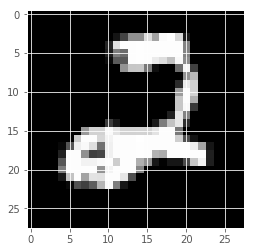

*******Z_SIZE: 4*******
-------AE-------
出力


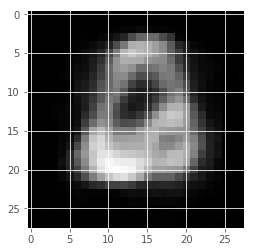

-------VAE-------
出力


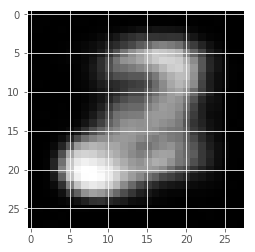

-------CVAE-------
出力


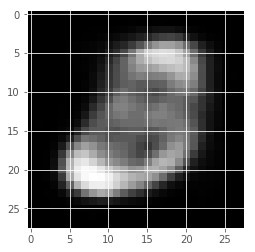

出力


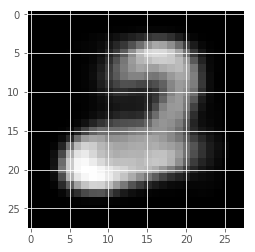

出力


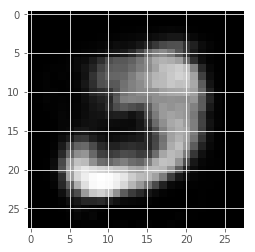

*******Z_SIZE: 16*******
-------AE-------
出力


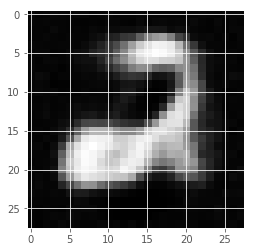

-------VAE-------
出力


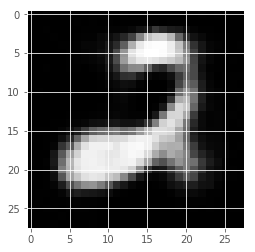

-------CVAE-------
出力


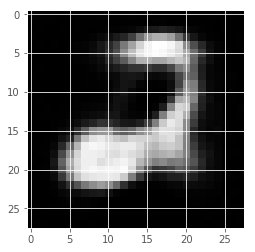

出力


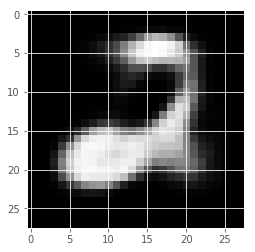

出力


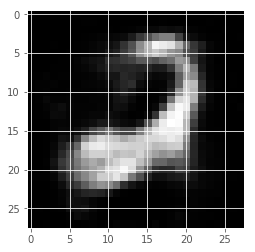

*******Z_SIZE: 64*******
-------AE-------
出力


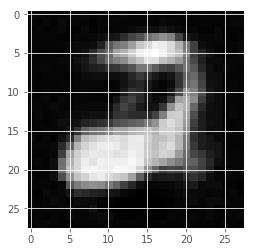

-------VAE-------
出力


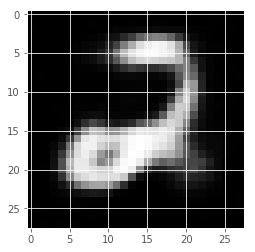

-------CVAE-------
出力


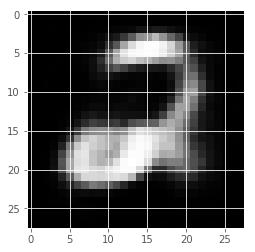

出力


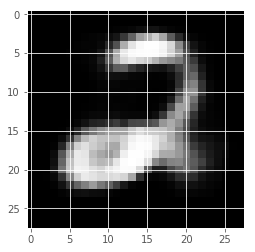

出力


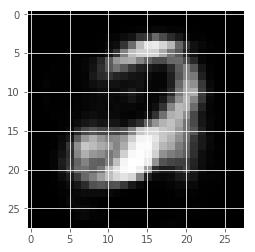

In [0]:
num = 100
number = 2
cvae_labels = [-1, number, 7]
#num = 1
#number = 4
#cvae_labels = [-1, number, 9]

print('入力')
pixels = (X_test[num] * 256).reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

for Z_SIZE in [4, 16, 64]:
    print('*******Z_SIZE: {0}*******'.format(Z_SIZE))
    MODEL_PATH_AE = './files/AE_1000_{0}.model'.format(Z_SIZE)
    MODEL_PATH_VAE = './files/VAE_1000_{0}.model'.format(Z_SIZE)
    MODEL_PATH_CVAE = './files/CVAE_1000_{0}.model'.format(Z_SIZE)
    LABEL_SIZE = 10
    INPUT_SIZE = 784
    HIDDEN_SIZE = 128


    ae_model = AE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE)
    vae_model = VAE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE)
    cvae_model = CVAE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE, LABEL_SIZE)

    chainer.serializers.load_npz(MODEL_PATH_AE, ae_model)
    chainer.serializers.load_npz(MODEL_PATH_VAE, vae_model)
    chainer.serializers.load_npz(MODEL_PATH_CVAE, cvae_model)

    print('-------AE-------')
    test_decode(ae_model, X_test[[num]], None, './AE_{0}_{1}.png'.format(Z_SIZE, number))
    print('-------VAE-------')
    test_decode(vae_model, X_test[[num]], None, './VAE_{0}_{1}.png'.format(Z_SIZE, number))
    print('-------CVAE-------')
    for cvae_label in cvae_labels:
        test_decode(cvae_model, X_test[[num]], np.array([cvae_label], dtype='int32'), './CVAE_{0}_{1}_{2}.png'.format(Z_SIZE, number, cvae_label))

# 実験2（連続変化）

*******Z_SIZE: 4*******
---画像x---


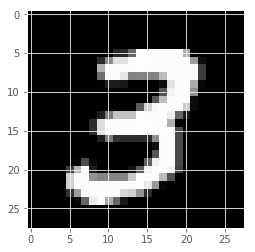

---画像y---


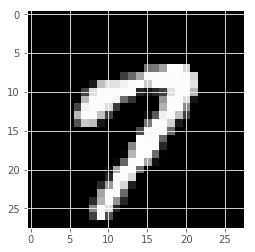

0番目


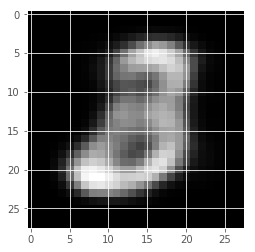

1番目


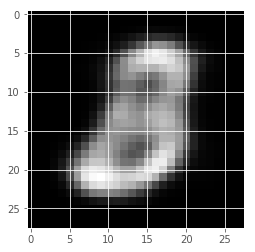

2番目


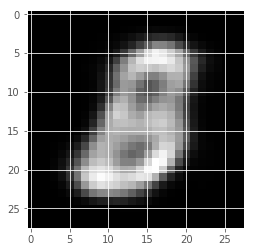

3番目


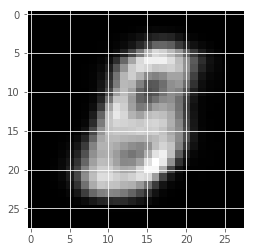

4番目


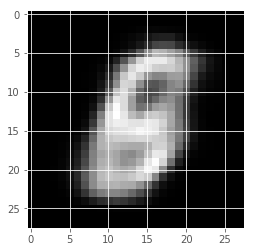

5番目


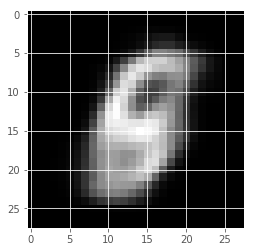

6番目


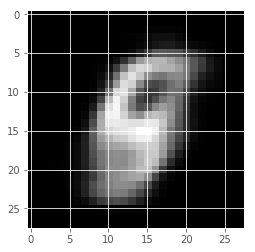

7番目


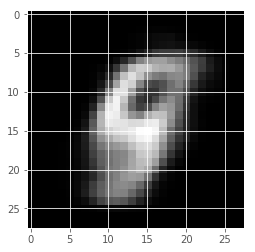

8番目


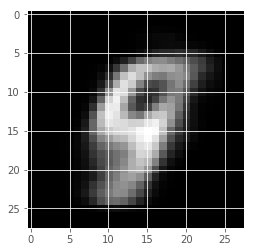

9番目


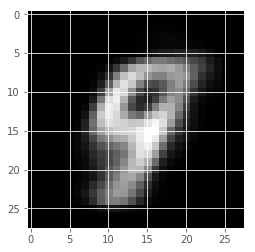

10番目


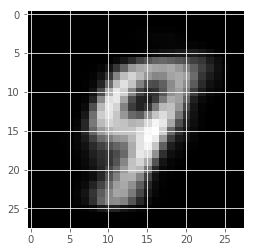

11番目


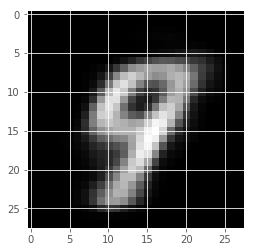

12番目


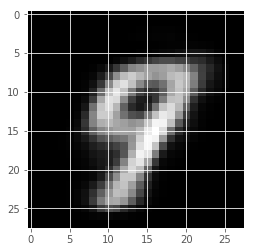

13番目


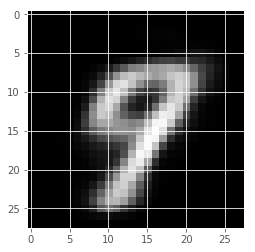

14番目


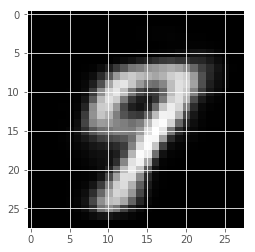

15番目


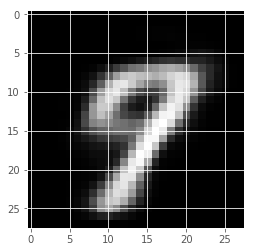

16番目


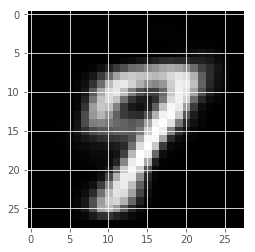

17番目


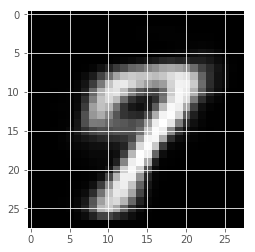

18番目


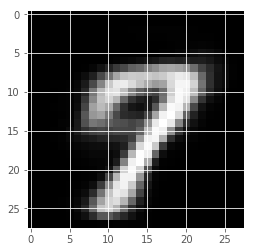

19番目


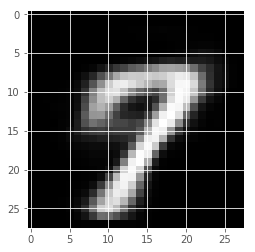

20番目


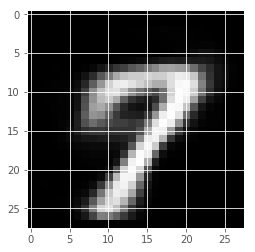

*******Z_SIZE: 16*******
---画像x---


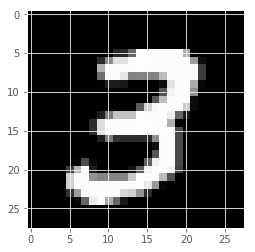

---画像y---


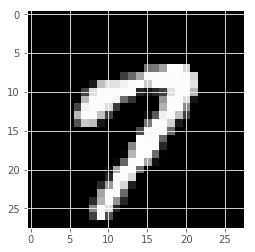

0番目


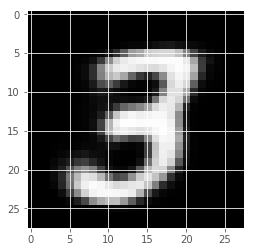

1番目


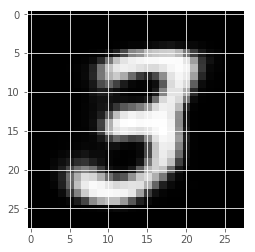

2番目


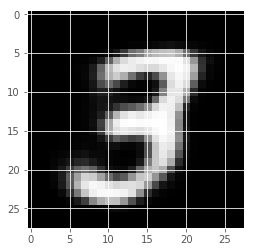

3番目


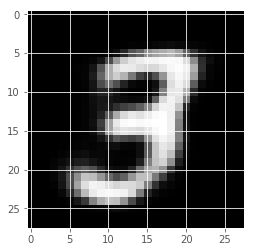

4番目


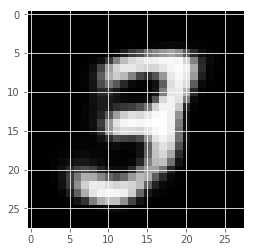

5番目


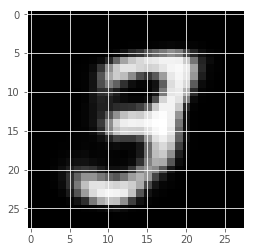

6番目


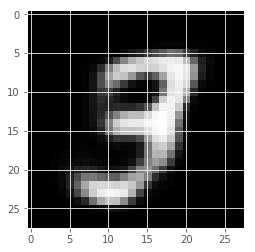

7番目


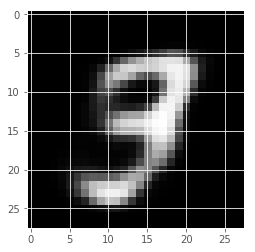

8番目


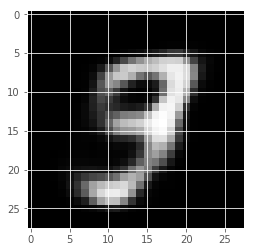

9番目


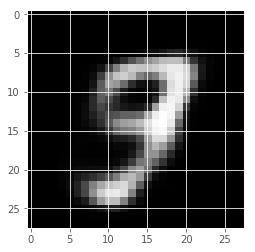

10番目


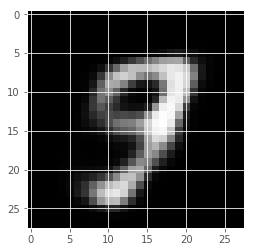

11番目


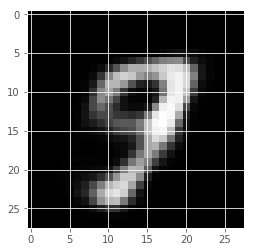

12番目


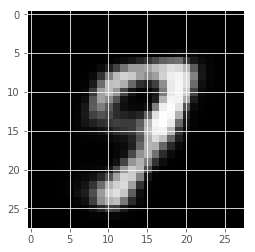

13番目


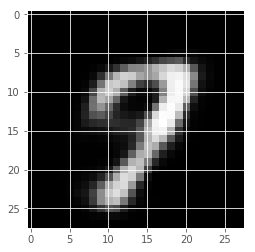

14番目


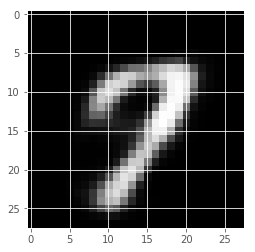

15番目


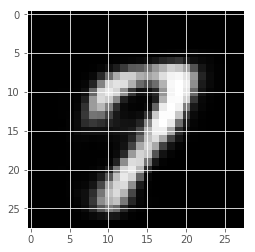

16番目


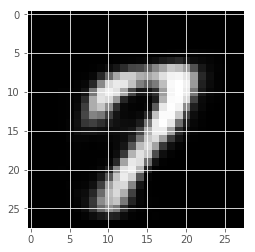

17番目


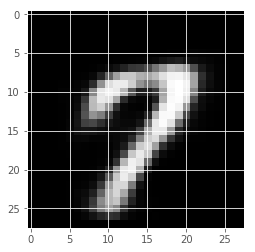

18番目


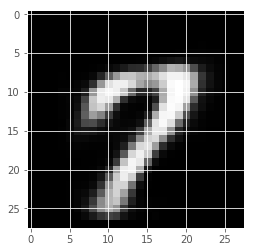

19番目


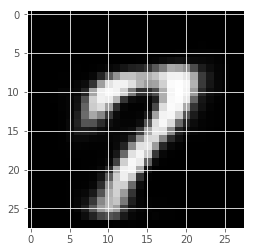

20番目


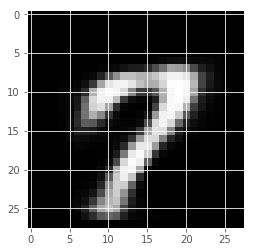

*******Z_SIZE: 64*******
---画像x---


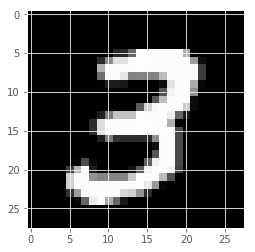

---画像y---


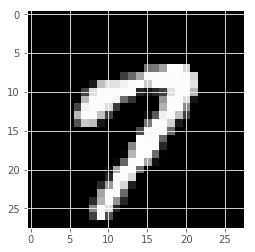

0番目


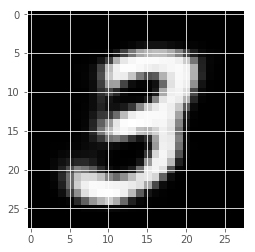

1番目


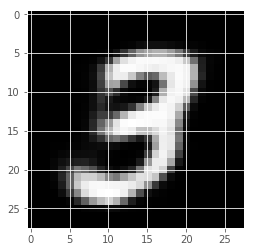

2番目


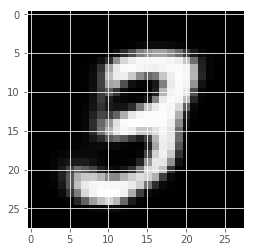

3番目


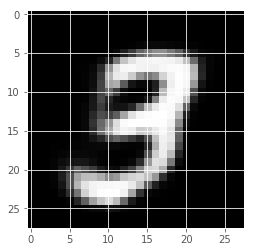

4番目


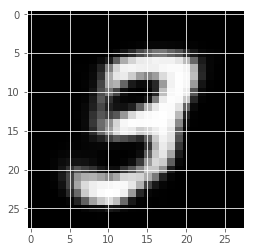

5番目


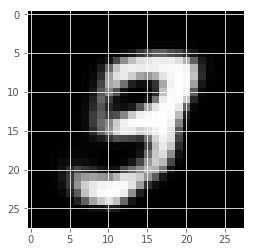

6番目


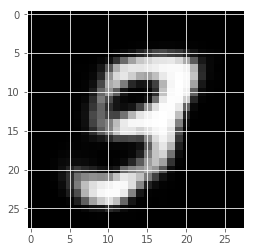

7番目


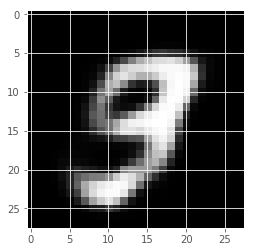

8番目


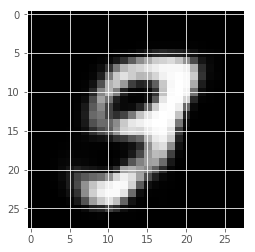

9番目


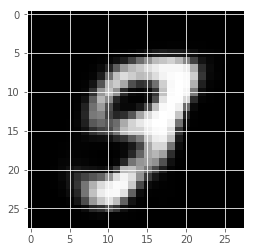

10番目


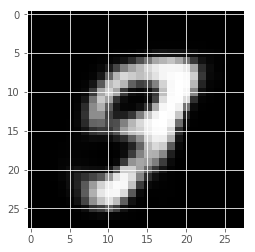

11番目


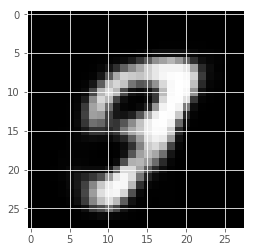

12番目


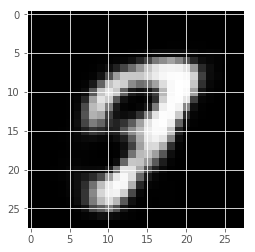

13番目


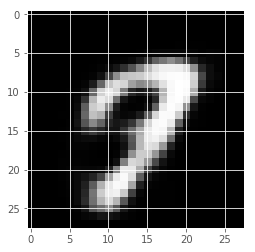

14番目


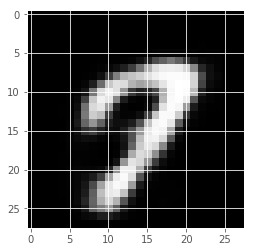

15番目


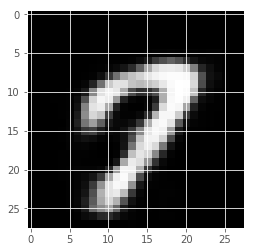

16番目


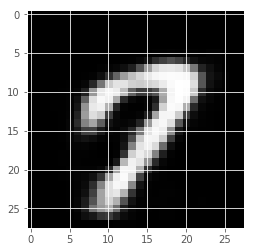

17番目


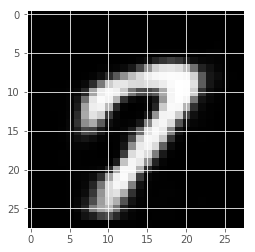

18番目


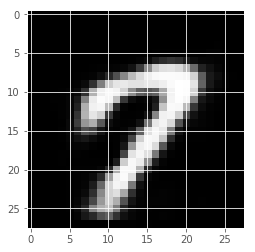

19番目


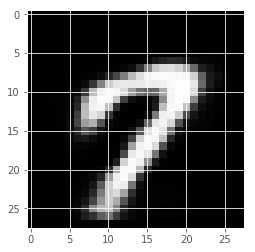

20番目


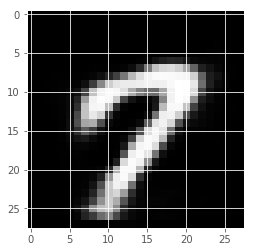

In [0]:
num1 = 7
num2 = 15
#num1 = 3
#num2 = 1

INPUT_SIZE = 784
HIDDEN_SIZE = 128

for Z_SIZE in [4, 16, 64]:
    print('*******Z_SIZE: {0}*******'.format(Z_SIZE))
    MODEL_PATH_VAE = './files/VAE_1000_{0}.model'.format(Z_SIZE)

    vae_model = VAE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE)
    chainer.serializers.load_npz(MODEL_PATH_VAE, vae_model)

    x = X_train[[num1]]
    y = X_train[[num2]]

    print('---画像x---')
    pixels = (x * 256).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

    print('---画像y---')
    pixels = (y * 256).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

    test_x_to_y(vae_model, x, y)

# 実験3（プロット）

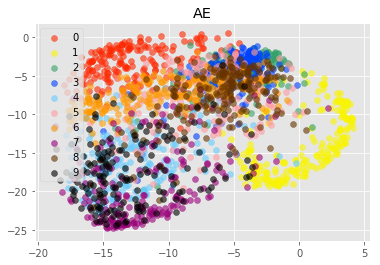

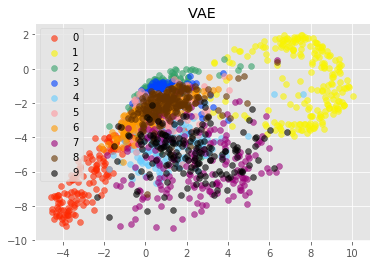

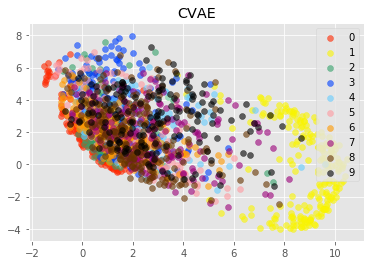

In [0]:
EPOCH_NUM = 1000
INPUT_SIZE = 784
HIDDEN_SIZE = 128
Z_SIZE = 2
MINIBATCH_SIZE = 100
LABEL_SIZE = 10

MODEL_NM_AE = 'AE'
MODEL_NM_VAE = 'VAE'
MODEL_NM_CVAE = 'CVAE'

MODEL_PATH_AE = './files/AE_1000_2.model'
MODEL_PATH_VAE = './files/VAE_1000_2.model'
MODEL_PATH_CVAE = './files/CVAE_1000_2.model'

ae_model = AE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE)
vae_model = VAE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE)
cvae_model = CVAE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE, LABEL_SIZE)

chainer.serializers.load_npz(MODEL_PATH_AE, ae_model)
chainer.serializers.load_npz(MODEL_PATH_VAE, vae_model)
chainer.serializers.load_npz(MODEL_PATH_CVAE, cvae_model)

test_plot(MODEL_NM_AE, ae_model, X_test, y_test)
test_plot(MODEL_NM_VAE, vae_model, X_test, y_test)
test_plot(MODEL_NM_CVAE, cvae_model, Xy_test, y_test)

# 実験4（クラスタリング）

No handles with labels found to put in legend.


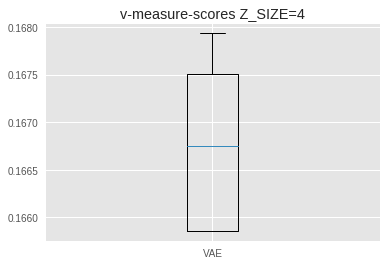

No handles with labels found to put in legend.


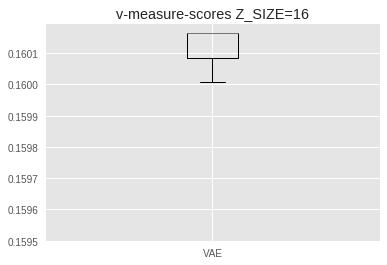

No handles with labels found to put in legend.


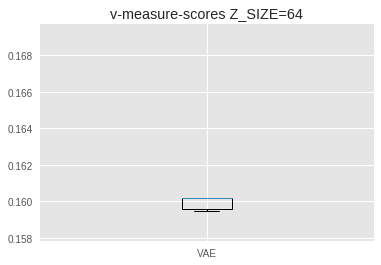

In [47]:
EPOCH_NUM = 1000
INPUT_SIZE = 784
HIDDEN_SIZE = 128
MINIBATCH_SIZE = 100
LABEL_SIZE = 10

MODEL_NM_AE = 'AE'
MODEL_NM_VAE = 'VAE'
MODEL_NM_CVAE = 'CVAE'

scores = {}

for Z_SIZE in [4, 16, 64]:

    MODEL_PATH_VAE = './files/VAE_{0}_{1}.model'.format(EPOCH_NUM, Z_SIZE)
    vae_model = VAE(INPUT_SIZE, Z_SIZE, HIDDEN_SIZE)
    chainer.serializers.load_npz(MODEL_PATH_VAE, vae_model)
    
    score_vae = []
    for _ in range(50):
        score_vae.append(test_kmeans(MODEL_NM_VAE, vae_model, X_test, y_test))
    scores[Z_SIZE] = {
        MODEL_NM_VAE: score_vae,
    }
    fig = plt.figure()
    ax = fig.add_subplot(111)

    bp = ax.boxplot((score_vae))
    ax.set_xticklabels(['VAE'])
    plt.legend()
    plt.title('v-measure-scores Z_SIZE={0}'.format(Z_SIZE))
    plt.show()

In [44]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  drive/  img/
datalab/                                               files/  text.txt


In [0]:
!cp text.txt 'drive/Colab Notebooks/chainer/DeepEmbeddedClustering-master'